## Author: Raphael Bruggmann, 
## Location: Zurich, 
## Date: 15.08.2023

## Description of the Project: Private Algo-Investment model BRENT OIL
The aim of this project is to develop an algorithmic trading notebook that models different types of strategies using any applicable market instrument from tqoa-Oanda/Reuters. As we cannot integrate the API directly, we will use static data in this project. Our strategy will be focused on the "BRENT" instrument Cal 2005 to Cal 2023.

To forecast the market's direction (up or down), we will use a broad library of model approaches. The range of models integrated into the project is intentionally wide, spanning from very static conventional approaches to more machine learning approaches. It is important that all the chosen models in the project remain comparable based on their cumulative returns, the accuracy (test data), and the cumulative strategy. Obviously there are some limits to the comparability, since some models are integrating a split of test and train data and simple models are based on a constraint based approach such as RSI and Bolliger Band. 

Following algos are applied: 

1. Bolliger Band 
2. Relative Strengthen Index (RSI)
3. Logistic Classifier with Grid search and cross validation - pipeline structure
4. KNN Classifier with Grid search and cross validation - pipeline structure
5. Recurrent Neural Network (RNN) Simple 
6. Recurrent Neural Network (RNN) with Financial Features and data Split (train/Test)
7. Density Neutral Network (DNN) with object oriented programming (DNN1 to DNN4)



#### 0. Data Exploration and Viszualization: 

I conducted a preliminary exploratory data analysis to gain a better understanding of the data and assess its quality. The analysis will primarily involve visualization libraries to gain insights into the data. Plotly will be a useful tool for visualizing the necessary data. To have a complete information set similar to what is available on regular trading platforms, it will be important to create a chart that includes Open, High, Low, Close, and Volume information. In addition to the usual charts such as histograms and line charts, this chart will provide valuable insights into the price trends and trading volume over time.

The price data source and information are as follows:

    1. Oanda Free account / Reuters historical data 2005 to 2023 Brent prices 
    2. Open, High, low, close and volume 
    3. Adding additional Plots 
    4. Lagged price data with a lag of 5 steps 

For python script we are mostly going to work with a jupyter notebook "exam_script" combined with a "formula_collection.py" script which is saving some helper function to support the main jupyter notebook. The Data import is based on "brent_ohlcv.xlsx" with historicals from 2005 to 2023. 

##### Notes to github and google_colab
The requirement for the submission of the project is that the .ipynb script runs on "google colab" connected with the publication of the github string /content/EXAM_ALGO/. In the first part of the code structre below we need: 

1. Connect to the public script in github

2. Clone https://github.com/neon89/EXAM_ALGO.git including brent_ohlcv.xlsx and formula_collection.py

3. Import with a corrected path the excel data (changed from .xlsx to .csv)

4. Set up the helper function imports for "formula_collection" with mounting google drive & install ipynb


##### Clone the entire repo.
Source: Best praticse according to https://colab.research.google.com/notebooks/io.ipynb

In [7]:
!git clone -l -s https://github.com/neon89/HILPISCH.git cloned-repo
%cd cloned-repo
!ls

[WinError 2] Das System kann die angegebene Datei nicht finden: 'cloned-repo'
C:\Users\Raphael Bruggmann\OneDrive\algo_trading_python\algo_trading\exam_scripts\algo_result


Der Befehl "git" ist entweder falsch geschrieben oder
konnte nicht gefunden werden.
Der Befehl "ls" ist entweder falsch geschrieben oder
konnte nicht gefunden werden.


In [2]:
# import all baisc libaries for the scripts
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import random
import numpy as np

In [3]:
# import the Brent data as raw variable
raw = pd.read_csv('brent_ohlcv.csv',sep=';',engine='c')

# cleaning the data 
raw.dropna(inplace=True)

# Check the format for dates, floats and objects 
raw.dtypes

Date       object
c         float64
o         float64
l         float64
h         float64
volume      int64
dtype: object

In [11]:
# changing the dtype to datetime 
raw['Date'] = pd.to_datetime(raw['Date'], errors='coerce')


In [12]:
# Set the index on the date and sort the prices series 
raw.set_index('Date',inplace=True)
raw.sort_index(ascending=True,inplace=True)


#### Import formula collection script 
Importing the Formula collection libary helps me to keep part of the code structure outside of the main script "exam_script"

In [13]:
import random
from formula_collection import *

In [14]:
# Check if data are imported correctly while checking their format and describe them
print(raw.info())
print(raw.describe())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4623 entries, 2005-05-31 to 2023-05-01
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   c       4623 non-null   float64
 1   o       4623 non-null   float64
 2   l       4623 non-null   float64
 3   h       4623 non-null   float64
 4   volume  4623 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 216.7 KB
None
                 c            o            l            h         volume
count  4623.000000  4623.000000  4623.000000  4623.000000    4623.000000
mean     76.771467    76.772014    75.646210    77.840450  185410.478910
std      24.558883    24.530855    24.337168    24.712407  101067.457246
min      19.330000    19.900000    15.980000    21.290000    5892.000000
25%      58.265000    58.215000    57.315000    59.115000  104661.500000
50%      72.120000    71.980000    71.060000    72.950000  183572.000000
75%      99.780000    99.750000    97.990000   10

In [15]:
# Checking the header of the raw data set
raw.head()

c      o      l      h  volume
Date                                          
2005-05-31  50.73  50.47  49.87  50.86   56287
2005-06-01  53.27  50.85  50.85  53.46   59033
2005-06-02  52.40  53.05  52.26  53.97   60690
2005-06-03  54.17  52.39  52.39  54.24   49014
2005-06-06  53.67  54.30  53.12  54.62   47082

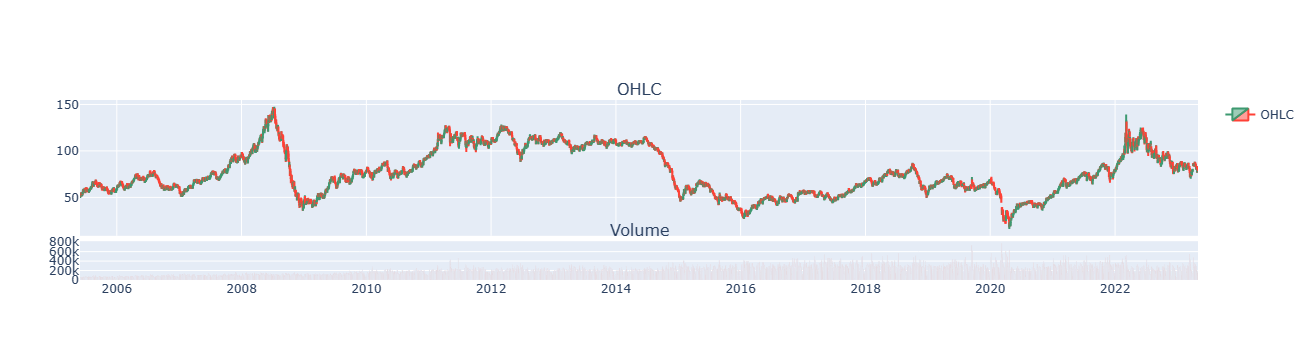

In [16]:
# Viszualisation of the Price Time Serie - Brent since 2005 to 2023 with help of plotly 
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Apply the function my_ohlcv_plot from the formula collection script
my_ohlcv_plot(raw)

In [17]:
# Apply basic function to calculte vola, returns, min, max.. "specs-function" coming from Formula collection
df_fe = specs(raw,20) 

# checking the 30 first value in the df
df_fe.head(30)

c      o      l      h  volume    return      vola  mom  \
Date                                                                      
2005-05-31  50.73  50.47  49.87  50.86   56287       NaN       NaN  NaN   
2005-06-01  53.27  50.85  50.85  53.46   59033  0.048856       NaN  NaN   
2005-06-02  52.40  53.05  52.26  53.97   60690 -0.016467       NaN  NaN   
2005-06-03  54.17  52.39  52.39  54.24   49014  0.033221       NaN  NaN   
2005-06-06  53.67  54.30  53.12  54.62   47082 -0.009273       NaN  NaN   
2005-06-07  53.13  53.65  52.72  53.90   58501 -0.010112       NaN  NaN   
2005-06-08  52.11  53.05  51.95  54.50   59694 -0.019385       NaN  NaN   
2005-06-09  53.82  51.95  51.61  53.95   47614  0.032288       NaN  NaN   
2005-06-10  52.67  53.90  52.56  54.30   40401 -0.021599       NaN  NaN   
2005-06-13  54.78  52.55  52.55  54.86   34732  0.039279       NaN  NaN   
2005-06-14  53.73  54.61  53.65  54.71   33662 -0.019354       NaN  NaN   
2005-06-15  54.50  54.10  54.02  55.07   16947  0.014229       NaN  NaN   
2005-06-16  56.22  55.24  55.08  56.39   57590  0.031072       NaN  NaN   
2005-06-17  57.76  56.40  56.15  57.95   53277  0.027024       NaN  NaN   
2005-06-20  58.32  57.80  57.30  58.58   53724  0.009649       NaN  NaN   
2005-06-21  57.50  57.95  57.30  58.48   69000 -0.014160       NaN  NaN   
2005-06-22  56.58  57.26  56.38  58.00   61883 -0.016129       NaN  NaN   
2005-06-23  57.96  56.88  56.66  58.55   63122  0.024098       NaN  NaN   
2005-06-24  58.36  58.32  57.65  58.51   48635  0.006878       NaN  NaN   
2005-06-27  59.30  58.85  58.70  59.59   46940  0.015979       NaN  NaN   
2005-06-28  57.18  59.10  56.85  59.14   60665 -0.036405  0.024811  1.0   
2005-06-29  56.15  57.33  55.86  57.33   67543 -0.018178  0.023190  1.0   
2005-06-30  55.58  56.15  55.04  56.71   73468 -0.010203  0.022960  1.0   
2005-07-01  57.54  55.70  55.46  57.92   45851  0.034657  0.023061  1.0   
2005-07-04  57.94  57.65  57.40  58.10   15503  0.006928  0.022891  1.0   
2005-07-05  58.29  57.90  57.85  58.72   54859  0.006023  0.022657  1.0   
2005-07-06  59.85  58.40  58.38  60.01   61141  0.026411  0.022414  1.0   
2005-07-07  59.28  60.04  55.55  60.70   79330 -0.009569  0.021869  1.0   
2005-07-08  58.20  59.22  57.97  60.36   58102 -0.018387  0.021675  1.0   
2005-07-11  57.44  57.60  56.62  57.79   52593 -0.013144  0.020446  1.0   

                 sma       min       max  
Date                                      
2005-05-31       NaN       NaN       NaN  
2005-06-01       NaN       NaN       NaN  
2005-06-02       NaN       NaN       NaN  
2005-06-03       NaN       NaN       NaN  
2005-06-06       NaN       NaN       NaN  
2005-06-07       NaN       NaN       NaN  
2005-06-08       NaN       NaN       NaN  
2005-06-09       NaN       NaN       NaN  
2005-06-10       NaN       NaN       NaN  
2005-06-13       NaN       NaN       NaN  
2005-06-14       NaN       NaN       NaN  
2005-06-15       NaN       NaN       NaN  
2005-06-16       NaN       NaN       NaN  
2005-06-17       NaN       NaN       NaN  
2005-06-20       NaN       NaN       NaN  
2005-06-21       NaN       NaN       NaN  
2005-06-22       NaN       NaN       NaN  
2005-06-23       NaN       NaN       NaN  
2005-06-24       NaN       NaN       NaN  
2005-06-27       NaN       NaN       NaN  
2005-06-28  0.005984 -0.036405  0.048856  
2005-06-29  0.002633 -0.036405  0.039279  
2005-06-30  0.002946 -0.036405  0.039279  
2005-07-01  0.003018 -0.036405  0.039279  
2005-07-04  0.003828 -0.036405  0.039279  
2005-07-05  0.004634 -0.036405  0.039279  
2005-07-06  0.006924 -0.036405  0.039279  
2005-07-07  0.004831 -0.036405  0.039279  
2005-07-08  0.004992 -0.036405  0.039279  
2005-07-11  0.002371 -0.036405  0.034657

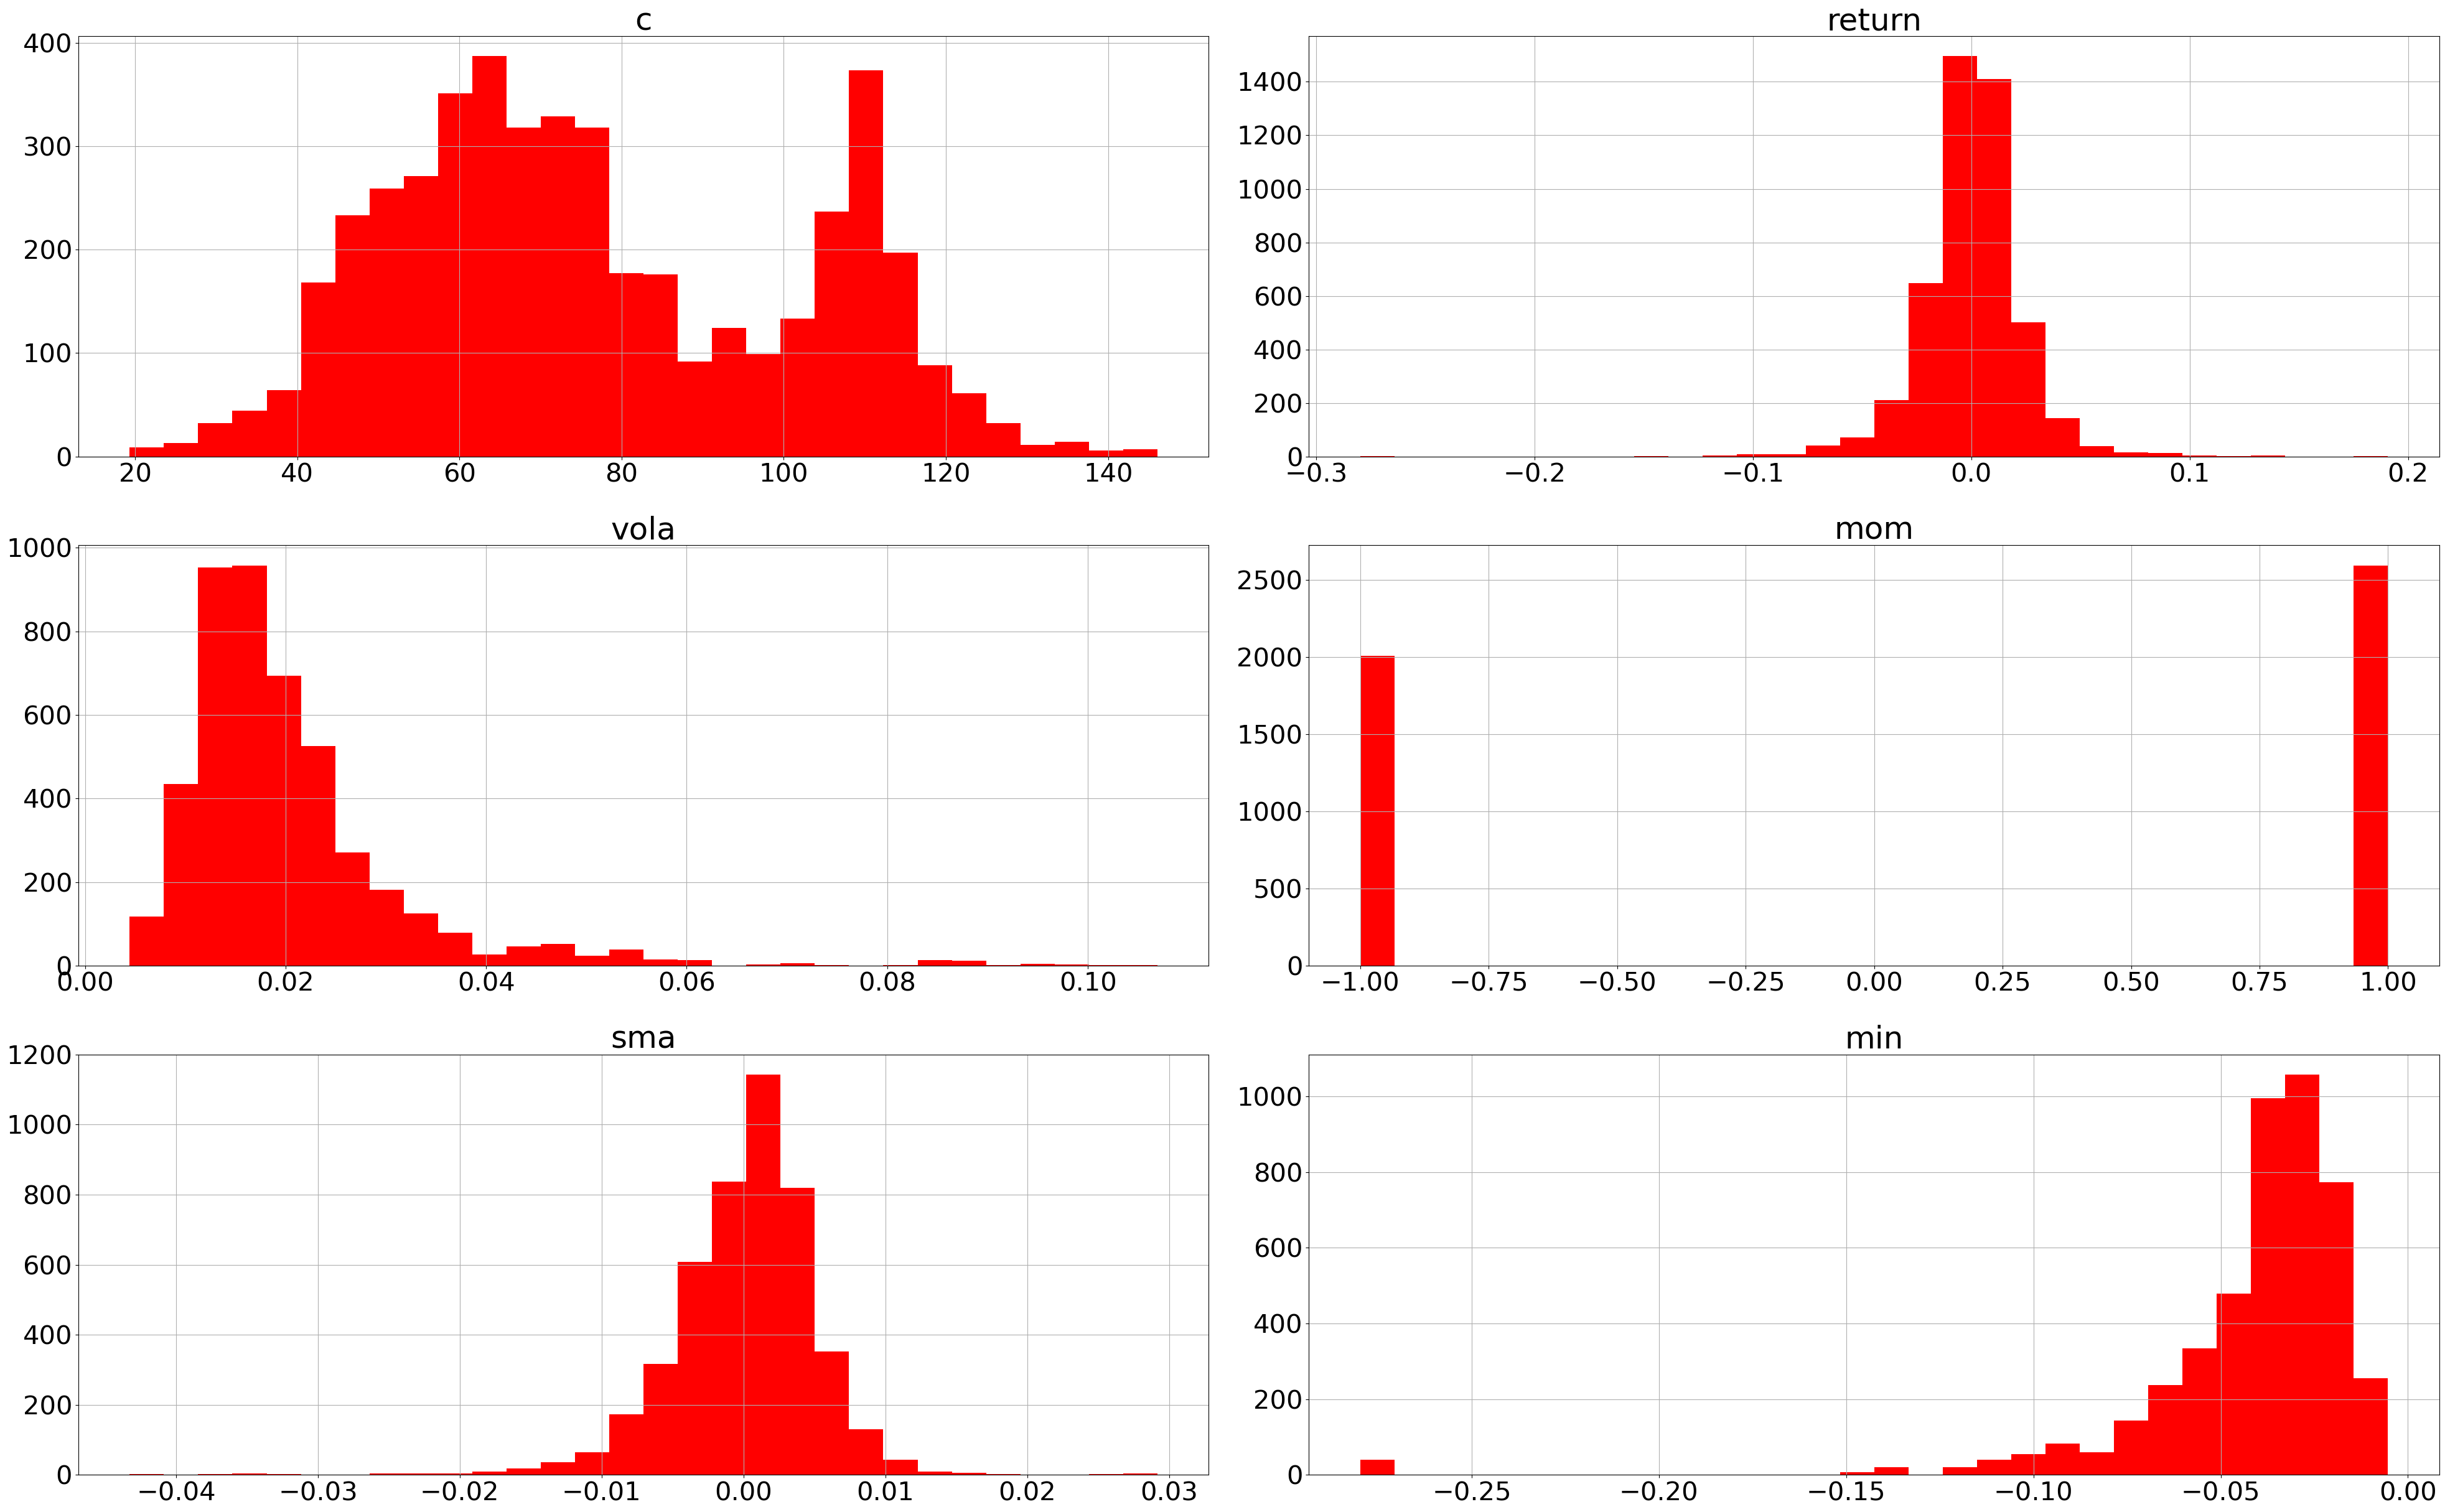

In [18]:
# Plotting raw data - histogram "formual_collection script"
myhistplot(df_fe[['c',
                  'return',
                  'vola',
                  'mom',
                  'sma',
                  'min',
                  'max']])

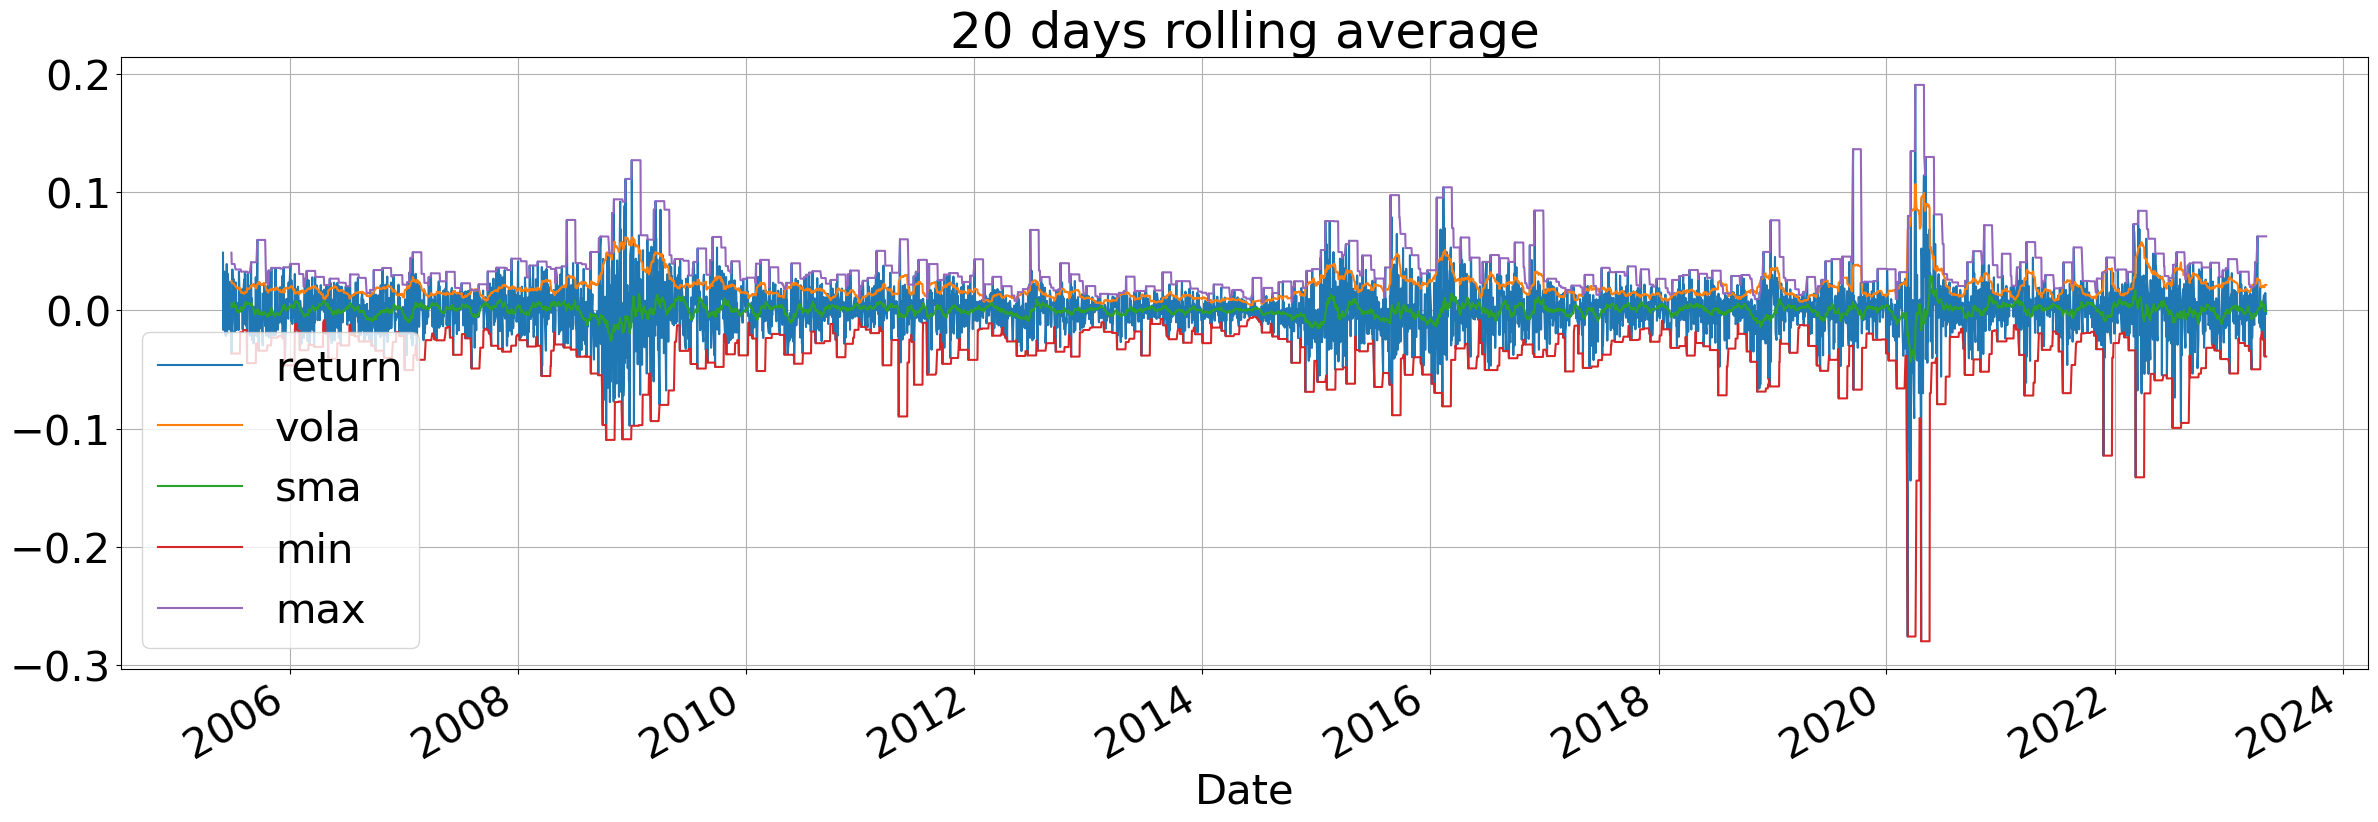

In [19]:
# df_fe is your DataFrame containing the data for plotting

import matplotlib.pyplot as plt

# Line chart for selected columns
df_fe[['return', 'vola', 'sma', 'min', 'max']].plot(figsize=(29, 9), grid=True, title='20 days rolling average')

# Display the plot
plt.show()


#### Comment on raw data [0]: 
- In the "forumla_collection.py" [function - specs()] script I calculated based on a 20-days window basic variables such as sma, min, max, mom values to get a sense of the Brent price data
- Brent has been illustrating high volatility in 2009, 2015-2017 with a strong drop in value 
- Price level rebound in Mar-20 after the COVID overall global oil demand destruction effect and demand slowly coming back
- The closing price over 2005 to 2023 had a tendency to be bipolar distributed with high frequency around 60 $perbbl and 110 $perbbl
- In order to run the following models I normalized in most of the cases the input variables 



# 1. Bolliger Band [simple linear code with helper function]
*Source: Book, Dr. Yves J. Hilpisch, Python for Algorithmic Trading, From Idea to Cloud deployment, Chp.4 Mastering Vectorized Backtesting, p.91 - p.121

*Source: Internet, https://www.linkedin.com/pulse/algorithmic-trading-mean-reversion-using-python-bryan-chen/?trackingId= 

*Source: Internet, https://surgetrader.com/how-to-use-bollinger-bands/?kw=&cpn=19615947823&utm_term=&utm_source=adwords&utm_medium=ppc&utm_campaign=PMax+-+Non+US&hsa_cam=19615947823&hsa_grp=&hsa_mt=&hsa_src=x&hsa_ad=&hsa_acc=4304032856&hsa_net=adwords&hsa_kw=&hsa_tgt=&hsa_ver=3&gad=1&gclid=CjwKCAjw9J2iBhBPEiwAErwpeW-b8k7YcK-3XNkTHK4dYTqVtifakm2aTkxbcTI95EkiKV5jgFtruRoCU2sQAvD_BwE

*Source: Internet, https://github.com/bryancwh/algo-trading-mean-reversion/blob/main/Mean%20Reversion.ipynb

The Bollinger Bands indicator is a technical analysis tool that consists of a center line and two price bands plotted above and below it. The center line is usually a moving average, while the upper and lower bands are calculated as a certain number of standard deviations away from the moving average.

The Bollinger Band strategy is based on the idea that the bands provide a measure of the market's volatility. When the market is trading within a relatively narrow range, the bands will be close together, indicating low volatility. Conversely, when the market is more volatile and trading in a wider range, the bands will be further apart, indicating high volatility. This strategy can help traders identify potential buy or sell signals, as well as measure the strength of the trend.


1. Defining the upper and lower bolliger band based on std()
2. Signal for lower and upper band
3. Strategy of execution
4. Cummulated strategy & returns over the specified trading period 

In [20]:
# Apply function bolliger band calculation from formula_collection.py [bolliger_band()]
# The performance of the model is dependent of chosing the boundaries ~+/-0.9
df_bol = bollinger_band(raw.copy(),.9,2.50,20) 


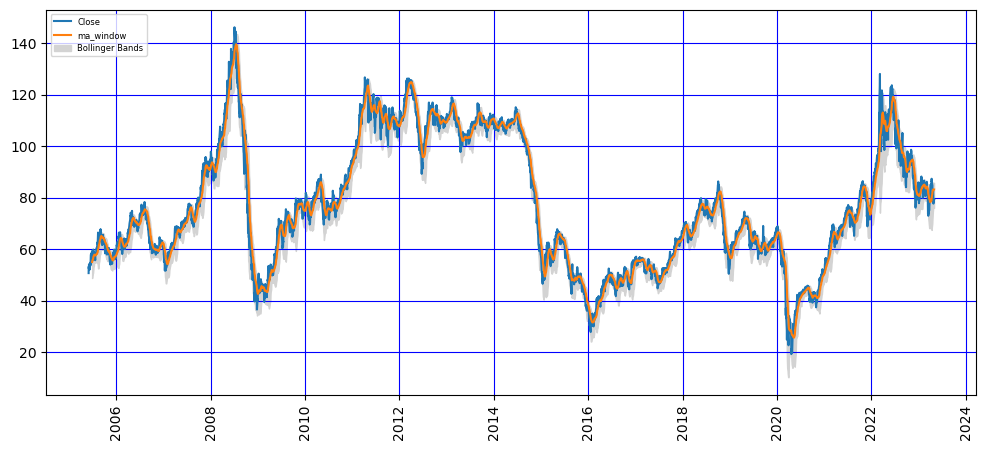

In [21]:
#plot for validation 
plt.figure(figsize=(12,5))
plt.xticks(rotation=90)
x_axis = df_bol.index

# plot parameters
plt.plot(x_axis, df_bol['c'], label = 'Close')
plt.plot(df_fe.index, df_bol['ma_window'], label = 'ma_window')

# fill between high and low bolliger band
plt.fill_between(x_axis, df_bol['upper_bol'], df_bol['lower_bol'], label = 'Bollinger Bands', color='lightgrey')

# adding layout and plotting
plt.grid(which='major', color='b', linestyle='-')
plt.grid(which='minor', color='r', linestyle='--')
plt.tick_params(axis='both', which='major', labelsize=10)
plt.tick_params(axis='both', which='minor', labelsize=8)
plt.legend(loc=2, prop={'size': 6})
plt.show()

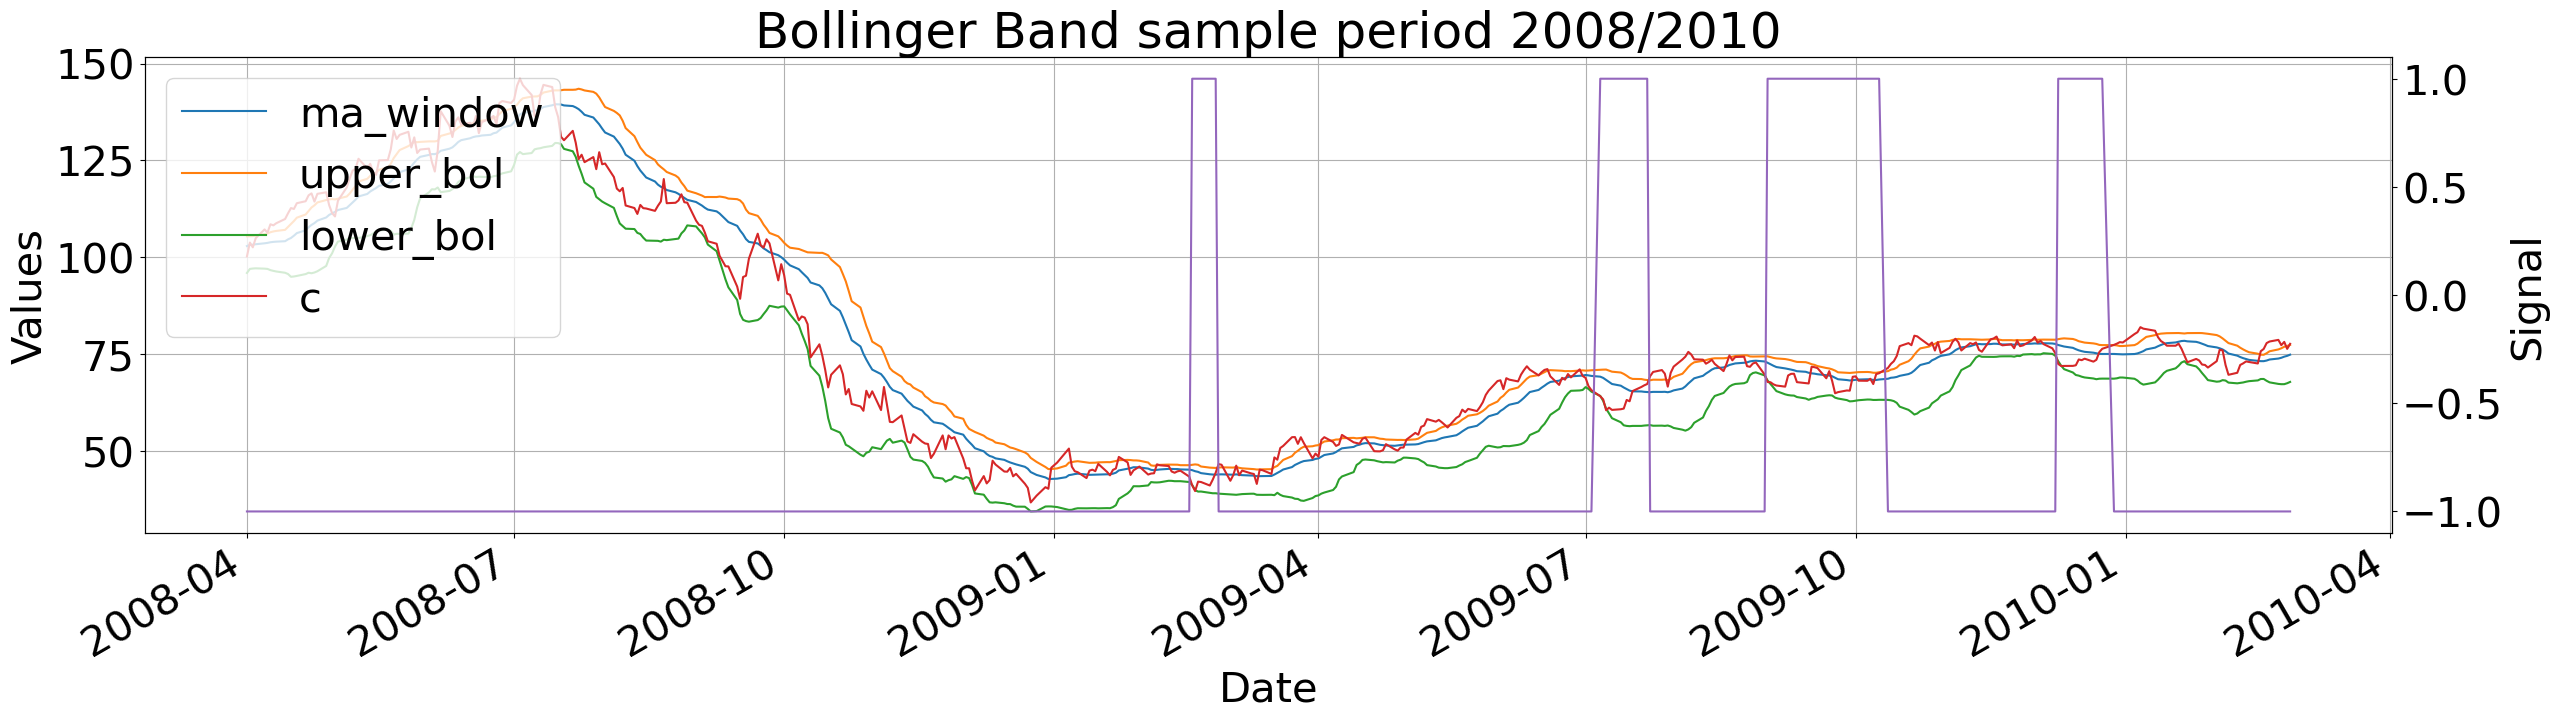

In [22]:
#  df_bol is your DataFrame containing the Bollinger Band and related data for plotting

import matplotlib.pyplot as plt

# Plotting Bollinger Bands and 'c' column for the specified time period
ax = df_bol[['ma_window', 'upper_bol', 'lower_bol', 'c']]['2008-04-01':'2010-02-28'].plot(figsize=(29, 7),
                                                                                          grid=True,
                                                                                          title='Bollinger Band sample period 2008/2010')

# Plotting the 'signal_bol' column as a line plot with a secondary y-axis
df_bol[['signal_bol']]['2008-04-01':'2010-02-28'].plot(figsize=(29, 7), secondary_y=True, ax=ax)

# Adding labels to the y-axes
ax.set_ylabel('Values')   # Left y-axis
ax.right_ax.set_ylabel('Signal') # Right y-axis

# Adding a legend
ax.legend(loc='upper left', labels=['ma_window', 'upper_bol', 'lower_bol', 'c', 'signal_bol'])

# Display the plot
plt.show()


# 2. Relative Strength Index [simple linear code with helper function]
*Source: Dr. Yves J. Hilpisch, Python for Algorithmic Trading, From Idea to Cloud deployment, Chp.4 Mastering Vectorized Backtesting, p.91 - p.121

*Source: Internet, https://www.linkedin.com/pulse/algorithmic-trading-mean-reversion-using-python-bryan-chen/?trackingId= 

*Source: Internet, https://github.com/bryancwh/algo-trading-mean-reversion/blob/main/Mean%20Reversion.ipynb

The Relative Strength Index (RSI) is a widely-used technical analysis indicator that measures the strength and momentum of a security's price action. It is typically calculated based on a time period of 14 days (or another specified period) and is displayed as an oscillator that ranges between 0 and 100.

In trading, the RSI is often used to identify potential overbought or oversold conditions. The RSI value is considered to be overbought when it is above 70 and oversold when it is below 30. When the RSI moves above 70, it is thought that the security is overbought and may be due for a price correction. Conversely, when the RSI falls below 30, it is thought that the security is oversold and may be due for a price rebound. Traders can use these signals to help identify potential buying or selling opportunities.


1. Calculating ema gains & loss based on the delta 
2. Calculating rsi 
3. Adding the signal conditions for trading execution at a level of 30 and 70
4. Setting up the cummulated strategy and returns 
5. Comparing this approach with the bolliger band

In [23]:
# Apply function RSI with the regular limits 30 & 70 and rolling 10 days 
df_rsi = rsi_indicator(raw.copy(),10)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


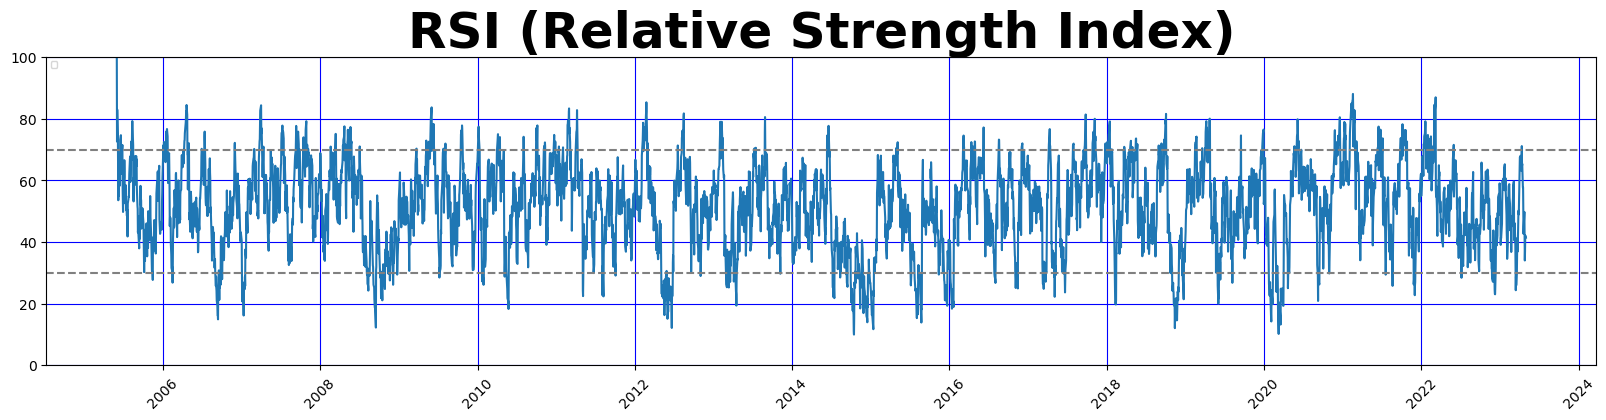

In [24]:
#plot for checking the price move vs. bounderies (30,70) 

#create figure 
plt.figure(figsize=(20,4))

# rotate ticks
plt.xticks(rotation=45)
x_axis = df_rsi.index

# plot rsi
plt.plot(x_axis, df_rsi['rsi'])

# adding fixed limits 30 & 70
plt.axhline(30, c= (.5,.5,.5), ls='--')
plt.axhline(70, c= (.5,.5,.5), ls='--')

# add title and y limit
plt.title('RSI (Relative Strength Index)', fontweight="bold")
plt.ylim([0, 100])

# add grid
plt.grid(which='major', color='b', linestyle='-')
plt.grid(which='minor', color='r', linestyle='--')

# add tics, legend
plt.tick_params(axis='both', which='major', labelsize=10)
plt.tick_params(axis='both', which='minor', labelsize=8)
plt.legend(loc=2, prop={'size': 6})

# plot
plt.show()

# Compare Bolliger Band with RSI 

<Axes: xlabel='Date'>

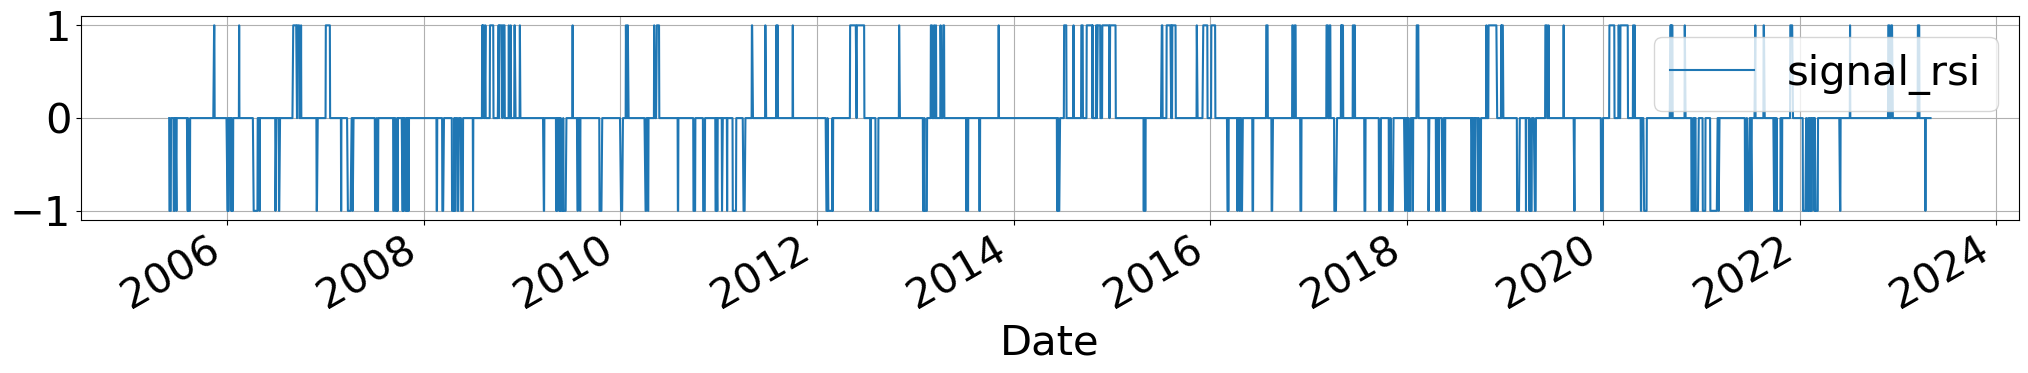

In [25]:
# filter after signal for buy or sell [1,-1] and plot
df_rsi.filter(like='signal_').plot(figsize=(25,3),grid=True)

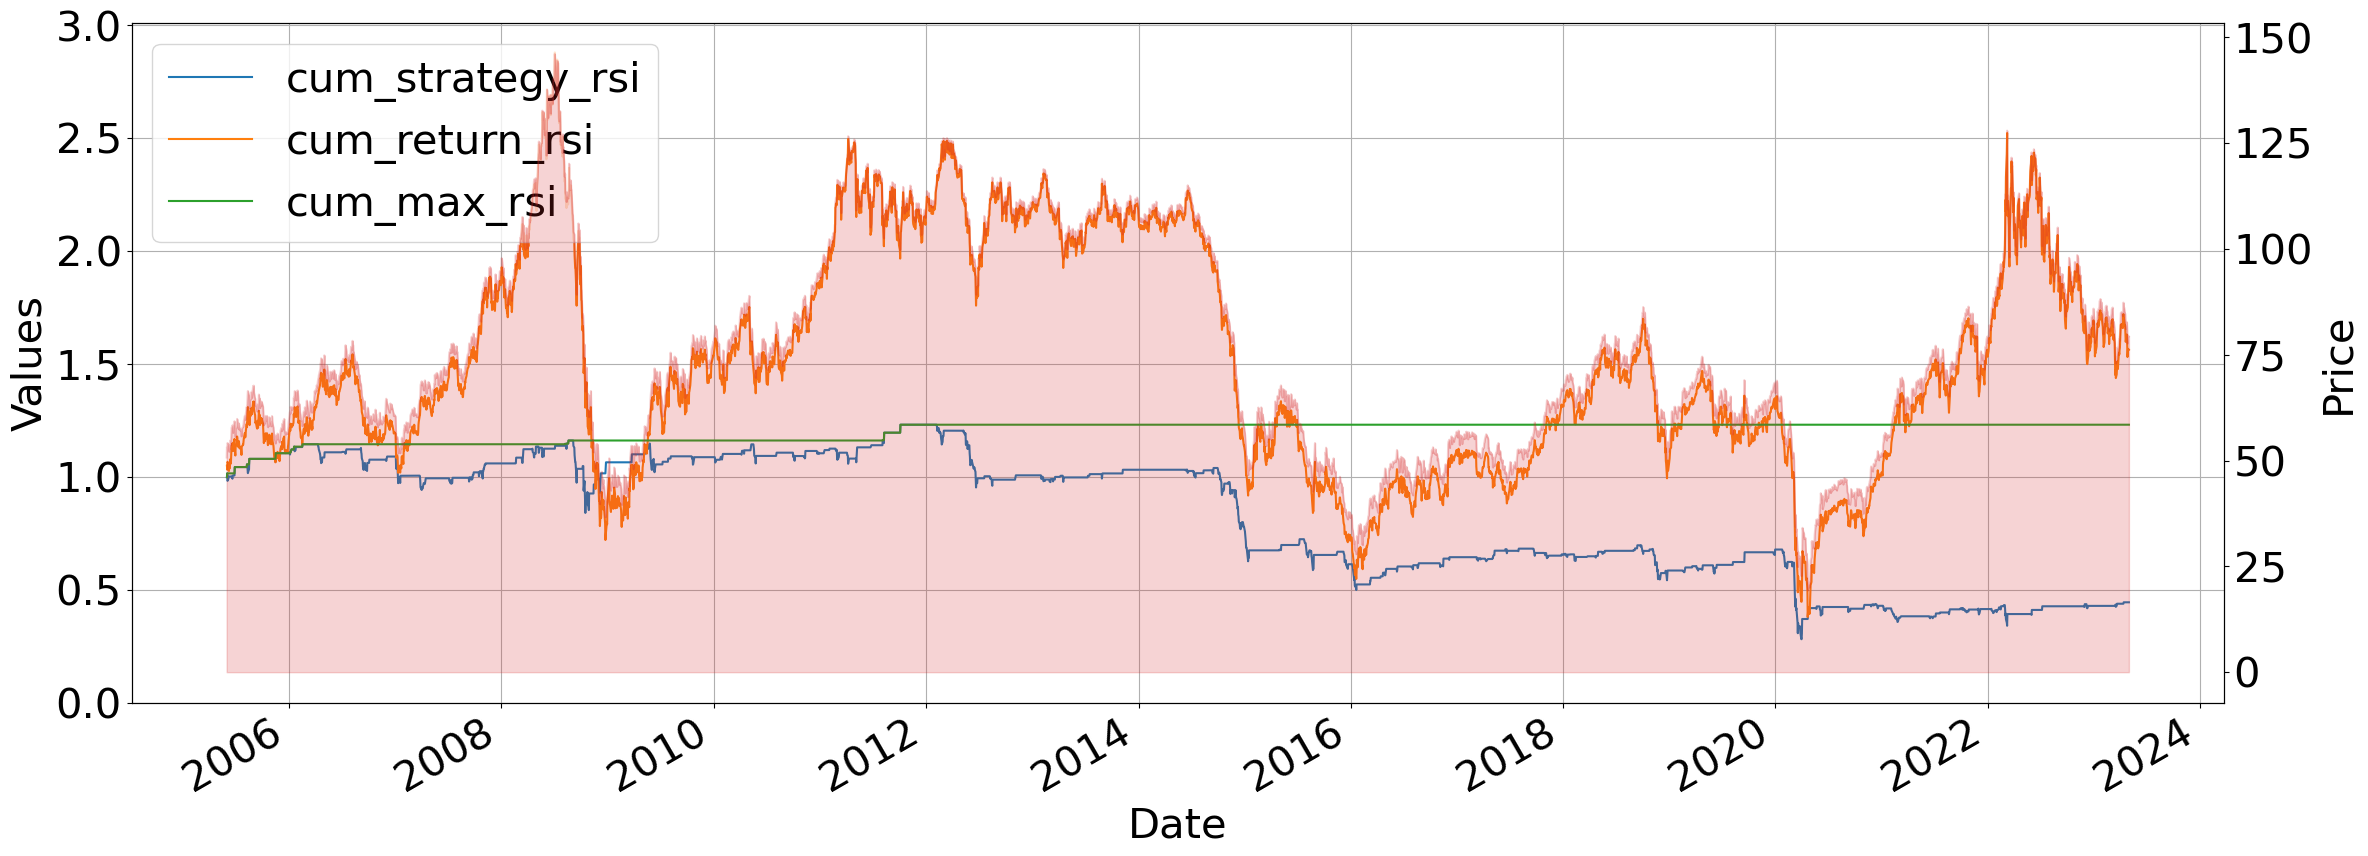

In [26]:
# df_rsi is your DataFrame containing the RSI and related data for plotting

import matplotlib.pyplot as plt

# Plotting the cumulative strategies, cumulative returns, and RSI values
ax = df_rsi.filter(like='cum_').plot(figsize=(25, 3), grid=True)

# Plotting the 'c' column as an area plot with a secondary y-axis
df_rsi[['c']].plot(kind='area', alpha=0.2, figsize=(27, 10), secondary_y=True, ax=ax)

# Adding labels to the y-axes
ax.set_ylabel('Values')        # Left y-axis
ax.right_ax.set_ylabel('Price') # Right y-axis

# Adding a legend
ax.legend(loc='upper left')

# Display the plot
plt.show()



#### Comment to rsi-index: 
- Static limits for the lower at 30 and the upper 70 not strongly in favor of generating during the period of 2006 to 2023 consistent returns 
- The losses on the RSI strategy are mainly coming from trend directions in 2009, 2014/15 and Mar-2020
- Probably it is not really advisable to trade after technical signals on longer periods, RSI might be more advisable for indexes with weak trends but on the other hand in sideways markets the returns are not strongly improving as what we can see for Brent
- An additional challenge are the number of trade executions which is for rsi strategy pretty frequent and increasing therefore the broker fees 

<Axes: xlabel='Date'>

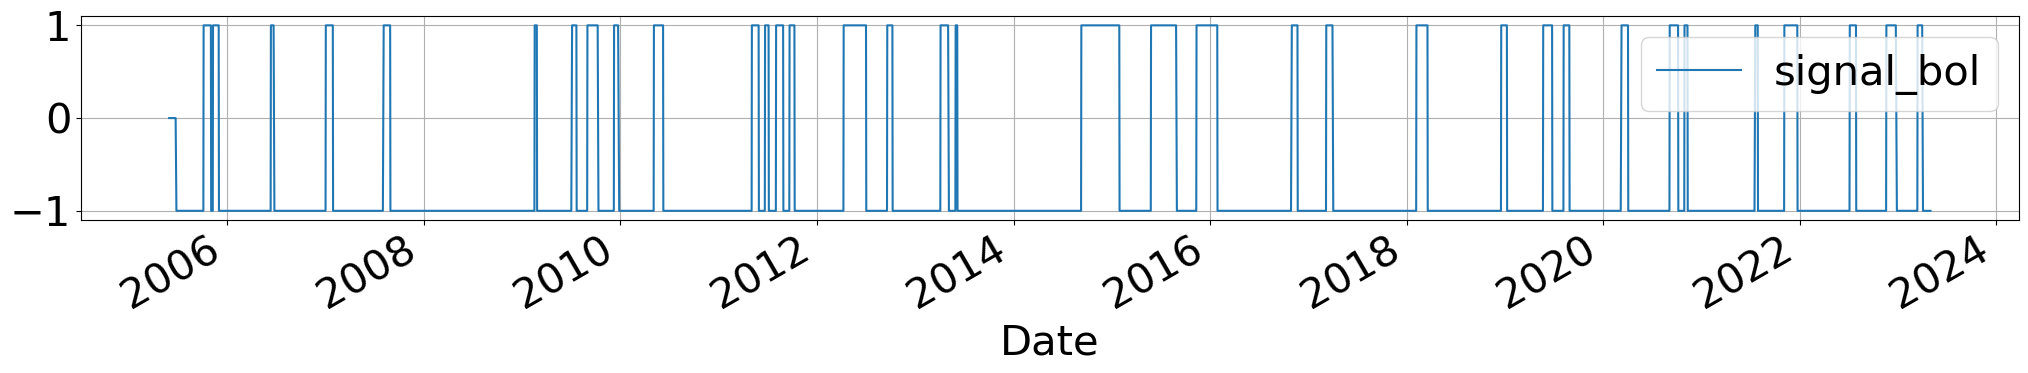

In [27]:
# Bolliger band signal plot buy or sell [1,-1]
df_bol.filter(like='signal_').plot(figsize=(25,3),grid=True)

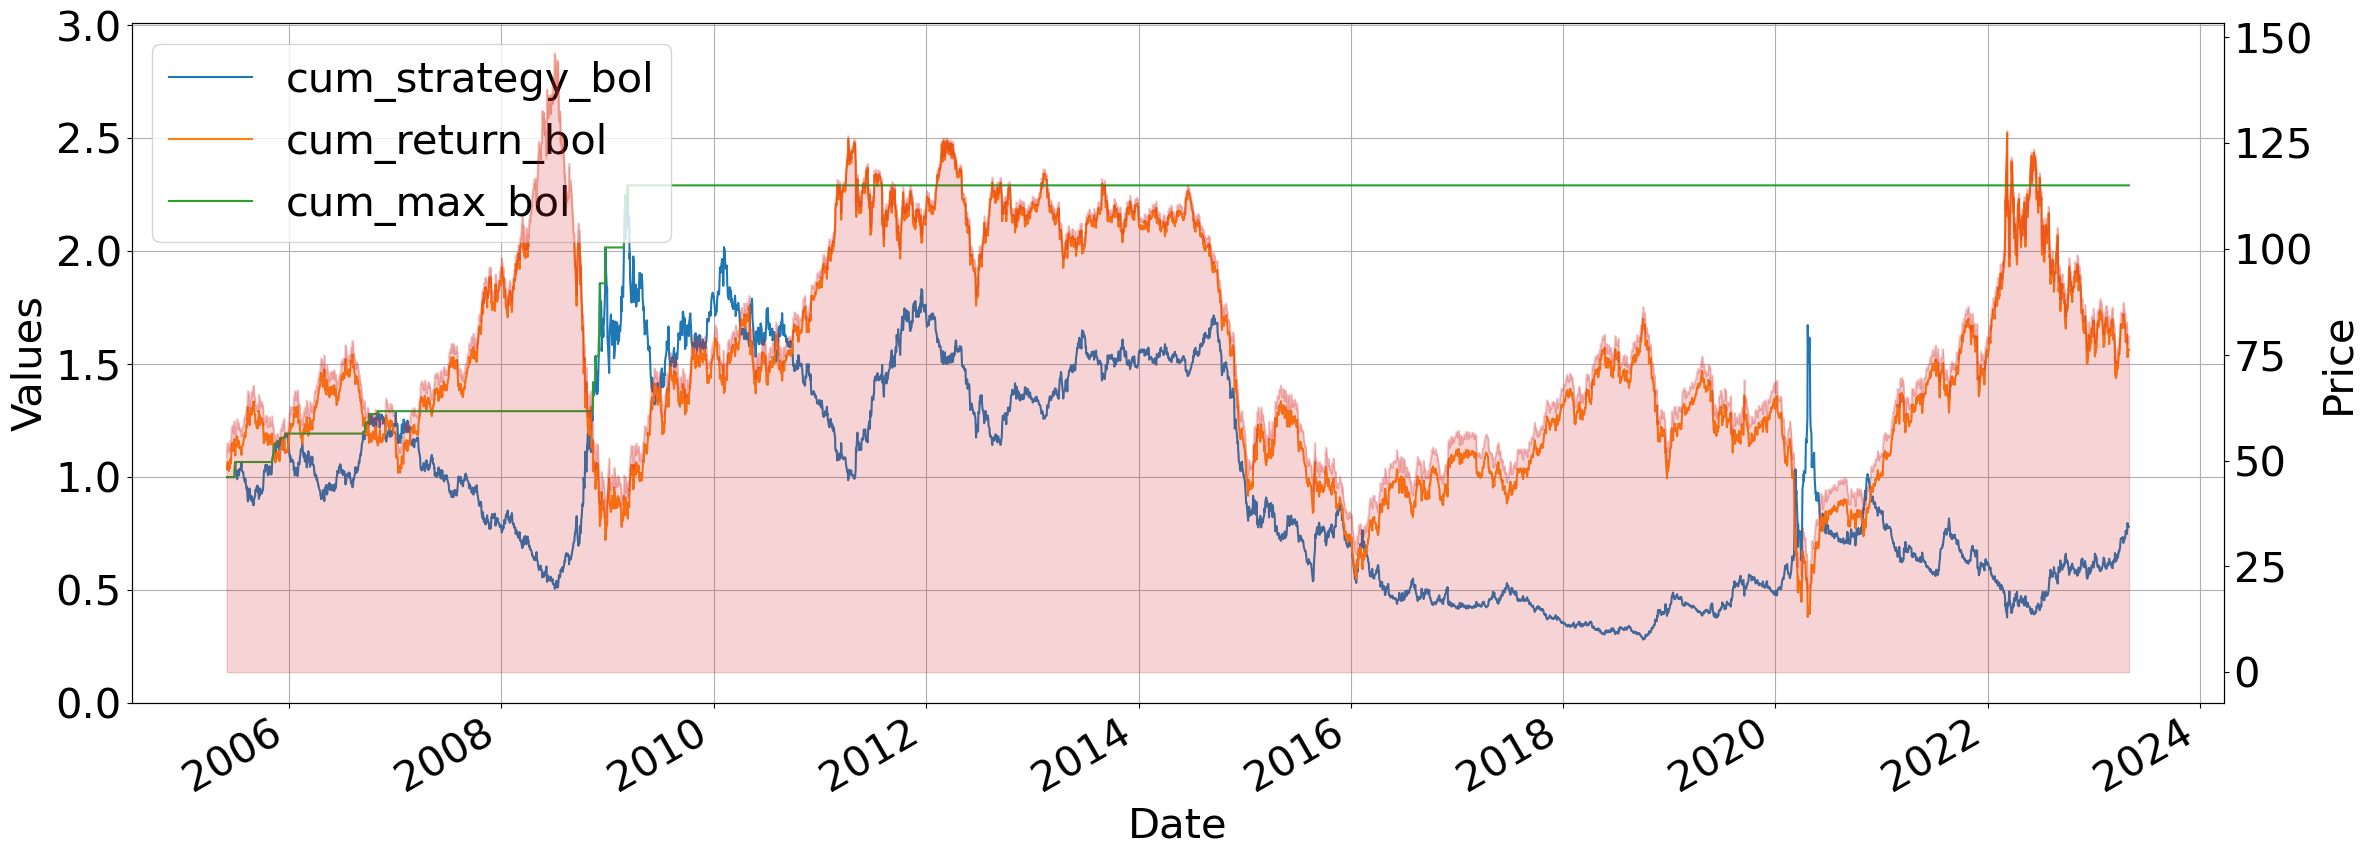

In [28]:
#  df_bol is your DataFrame containing the Bollinger Band and related data for plotting

import matplotlib.pyplot as plt

# Plotting the cumulative strategies, cumulative returns, and Bollinger Bands
ax = df_bol.filter(like='cum_').plot(figsize=(25, 10), grid=True)

# Plotting the 'c' column as an area plot with a secondary y-axis
df_bol[['c']].plot(kind='area', figsize=(27, 10), alpha=0.2, secondary_y=True, ax=ax)

# Adding labels to the y-axes
ax.set_ylabel('Values')        # Left y-axis
ax.right_ax.set_ylabel('Price') # Right y-axis

# Adding a legend
ax.legend(loc='upper left')

# Display the plot
plt.show()




#### Comment to Bolliger Band: 
- The importing element in the bolliger band trading strategy is to chose the bounderies in order to generate postive returns. The problem is once you have a trending bearish or bullish market, than your bolliger band strategy is probably losing value except if the bounderies are wide enough from the ma_window and not breaching boundary limits. 
- I was setting in our example the boundary at -2.9 (dollar/bbl) and the upper boundary at 0.9 (dollar/bbl) in order to take profit out of bearish market trends such as in 2009 and in Dec-20 during the Covid period.
- Max cumulated return has been reached already in mid-2008 at roughly 2.75.
- Conclusion of a bolliger band strategy is that this model is not learning, it is highly dependent the way you chose the boundries in the begining. 


# 3.Model Logistic regression with cross validation and grid search function
### Machine Learning - API scipy AI 
####    Logistic Classifier with grid search function and cross validation [Applying pipeline structure]:
*Source: Internet, https://scikit-learn.org/stable/modules/compose.html

*Source: Dr. Yves J. Hilpisch, Artificial Intelligence in Finance, The AI Machine, Chp.8 Recurrent Neural Network, p.204 - p.220

*Source: Internet, https://learn.extensionschool.ch/learn/programs/applied-data-science-machine-learning-v2/subjects/course-project-v9/units/image-classifier-v2

To develop a model using logistic regression in combination with grid search and cross-validation, it is necessary to split the data into training and test datasets. As different objects such as KFold/Sequential, StandardScaler, PCA (not applied in our business case since weak number of input variables), and logistic regression are added, it is recommended to use a pipeline structure to handle the data flow more efficiently instead of looping around the data.

The pipeline structure allows for a more streamlined and organized approach to model building, making it easier to incorporate different preprocessing techniques and models. This helps in reducing the amount of code and simplifying the data processing steps.

Using the pipeline structure, it is possible to apply all the preprocessing steps to the data in a single step, and then fit the logistic regression model with the grid search and cross-validation. By doing so, we can efficiently tune the hyperparameters of the logistic regression model to improve its performance and obtain better results.

1. Create a `Pipeline` object with scaler, PCA and the logistic regression.

2. Tune the number of components and `C` parameter using `
GridSearchCV`

3. Plot and analyze the validation curve with `C` values on the x-axis, the test performance on the y-axis and one curve per number of components. 

4. Filtering out the important parameters to understand the robustness of the model

5. Pick all training data (fit model) and compute the probability for each class (month) using the predict_proba() and with the test data  to check the accuracy of the month-forecast-model. 

6. Plot the results for each data set.The plot needs to explain me, how accurate the model worked on the different datasets (rows) 

In [29]:
# Creating the dataframe for the next model set 
df_AI = raw[['c','return']].copy()

# applying the sign -1 and 1
df_AI['direction'] = np.sign(df_AI['return'])


In [30]:
# transformation of the df into 5 lagged time series 
lags=5
cols=[]
for lag in range(1,lags+1):
    col = f'lag_{lag}'
    df_AI[col] = df_AI['return'].shift(lag)
    cols.append(col)
df_AI.dropna(inplace=True)

In [31]:
import scipy as sp
import sklearn

# split into train and test
from sklearn.model_selection import train_test_split

# Create X, y
X = df_AI[cols].values
y = df_AI['direction'].values

# Split into train/test sets for Logistic classifer and KNN Classifer
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.3, random_state=1)


In [32]:
# conda install -c conda-forge scikit-learn

In [33]:
# importing sklearn libaries for AI 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.model_selection import TimeSeriesSplit

# Create TimeSeries Split not Kfold 
kfold = TimeSeriesSplit() 

# Create pipeline and normalizing data with scaler 
pipe = Pipeline([
    ('scaler', StandardScaler()), 
    ('logreg', LogisticRegression(multi_class='ovr', solver='liblinear'))
])

from sklearn.model_selection import GridSearchCV
import numpy as np

# Create cross-validation object with steps 10 and range -20 to 20 
grid = {
    'logreg__C': np.logspace(-20, 20, num=10)

}
grid_cv = GridSearchCV(pipe, grid, cv=kfold, return_train_score=True)

# Fit estimator 
grid_cv.fit(X_tr, y_tr)

# Get the results with "cv_results_"
grid_cv.cv_results_.keys()
print("Best parameter (CV score=%0.3f):" % grid_cv.best_score_)
print(grid_cv.best_params_)

Best parameter (CV score=0.506):
{'logreg__C': 166.81005372000558}


In [34]:
# create dataframe on the prediction test data
lgreg_pred = pd.DataFrame(grid_cv.predict(X_te))

print("hits buy/sell on the Test data:",
      lgreg_pred.value_counts())


hits buy/sell on the Test data:  1.0    1198
-1.0     188
Name: count, dtype: int64


In [35]:
from sklearn.metrics import accuracy_score

# prediction output
df_AI['prediction_lgreg'] = grid_cv.predict(df_AI[cols].values)

# number of hits
df_AI['hits_lgreg'] = np.sign(df_AI['return'].iloc[lags:]*df_AI['prediction_lgreg'].iloc[lags:])

print(df_AI['hits_lgreg'].value_counts())

# The whole set of Data with an accuracy score
print(accuracy_score(df_AI['prediction_lgreg'],np.sign(df_AI['return'])))

hits_lgreg
 1.0    2395
-1.0    2205
 0.0      12
Name: count, dtype: int64
0.5196014728178471


In [36]:
# accuracy whole time series without split test-train
df_AI['strategy_lgreg'] = df_AI['prediction_lgreg']*df_AI['return']

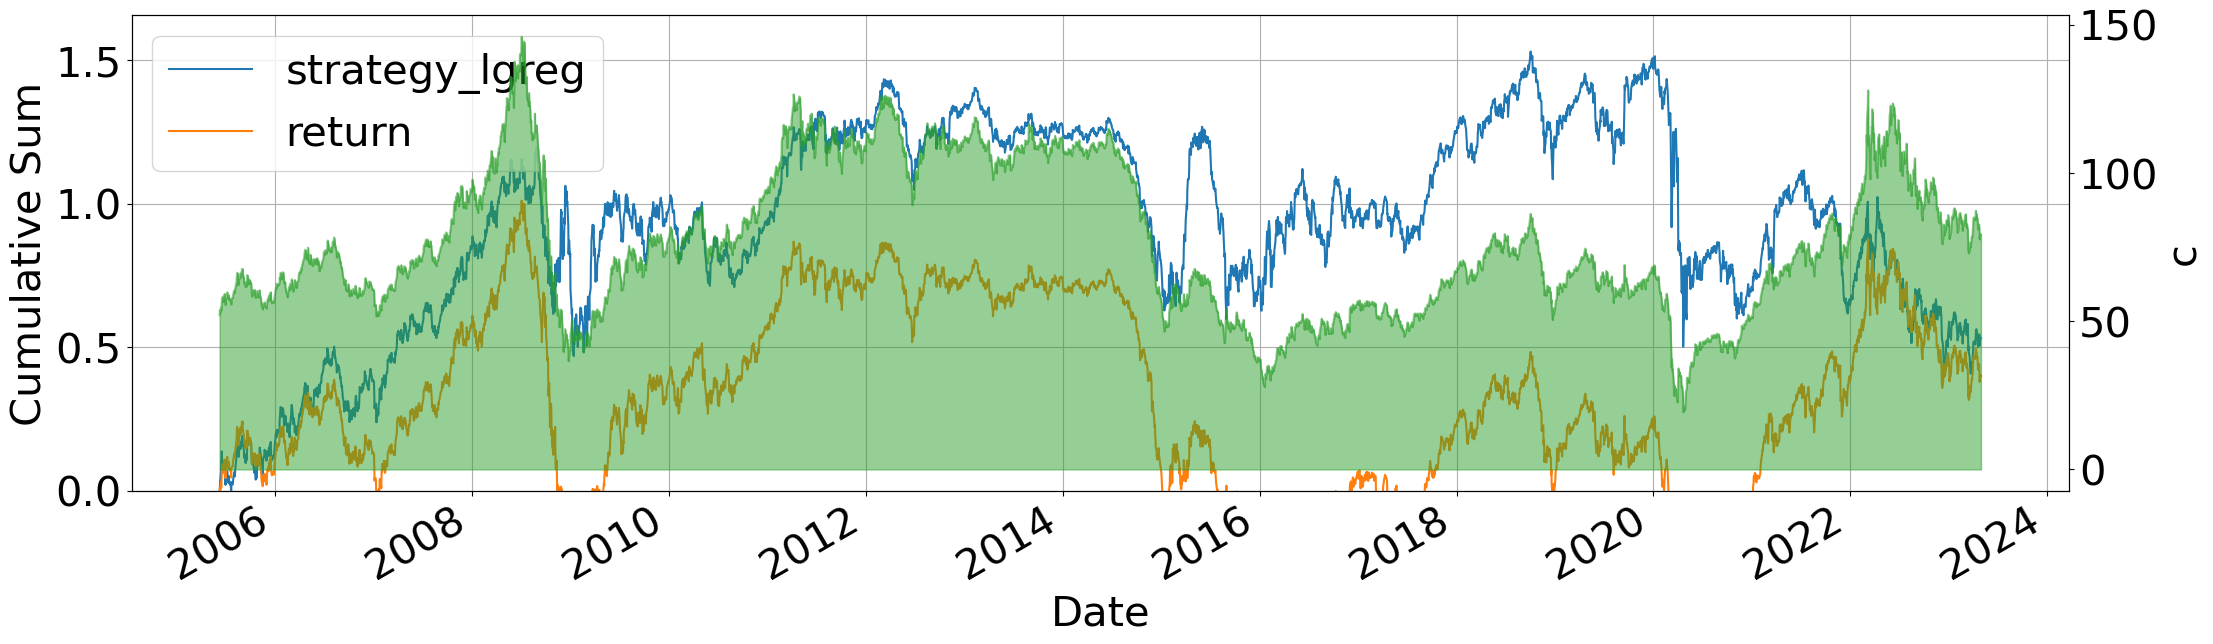

In [37]:
#  df_AI is your DataFrame containing the data for plotting

import matplotlib.pyplot as plt

# Plotting the cumulative sum of 'strategy_lgreg' and 'return' columns
ax = df_AI[['strategy_lgreg', 'return']].cumsum().plot(figsize=(25, 15), grid=True)

# Plotting the 'c' column as an area plot with a secondary y-axis
df_AI[['c']].plot(kind='area', figsize=(25, 7), secondary_y=True, ax=ax, alpha=0.5)

# Adding labels to the y-axes
ax.set_ylabel('Cumulative Sum')  # Left y-axis
ax.right_ax.set_ylabel('c')       # Right y-axis

# Adding a legend
ax.legend(loc='upper left', labels=['strategy_lgreg', 'return', 'c'])

# Display the plot
plt.show()


In [38]:
# Plot dataframe head to check results
df_AI.head()

c    return  direction     lag_1     lag_2     lag_3  \
Date                                                                   
2005-06-08  52.11 -0.019385       -1.0 -0.010112 -0.009273  0.033221   
2005-06-09  53.82  0.032288        1.0 -0.019385 -0.010112 -0.009273   
2005-06-10  52.67 -0.021599       -1.0  0.032288 -0.019385 -0.010112   
2005-06-13  54.78  0.039279        1.0 -0.021599  0.032288 -0.019385   
2005-06-14  53.73 -0.019354       -1.0  0.039279 -0.021599  0.032288   

               lag_4     lag_5  prediction_lgreg  hits_lgreg  strategy_lgreg  
Date                                                                          
2005-06-08 -0.016467  0.048856               1.0         NaN       -0.019385  
2005-06-09  0.033221 -0.016467               1.0         NaN        0.032288  
2005-06-10 -0.009273  0.033221              -1.0         NaN        0.021599  
2005-06-13 -0.010112 -0.009273               1.0         NaN        0.039279  
2005-06-14 -0.019385 -0.010112              -1.0         NaN        0.019354

In [39]:
# Collect results in a DataFrame
logreg_results = pd.DataFrame(grid_cv.cv_results_)

# Print a few interesting columns to check model run and sort values
cols_p = ['param_logreg__C',
          'mean_test_score',
          'std_test_score',
        'mean_train_score', 
          'std_train_score']

logreg_results[cols_p].sort_values('mean_test_score', ascending=False).head(5)

param_logreg__C  mean_test_score  std_test_score  mean_train_score  \
5               166.810054         0.505948        0.023552          0.527577   
6           4641588.833613         0.505948        0.023552          0.527577   
7      129154966501.489334         0.505948        0.023552          0.527577   
8       3593813663804640.5         0.505948        0.023552          0.527577   
9  100000000000000000000.0         0.505948        0.023552          0.527577   

   std_train_score  
5         0.006137  
6         0.006137  
7         0.006137  
8         0.006137  
9         0.006137

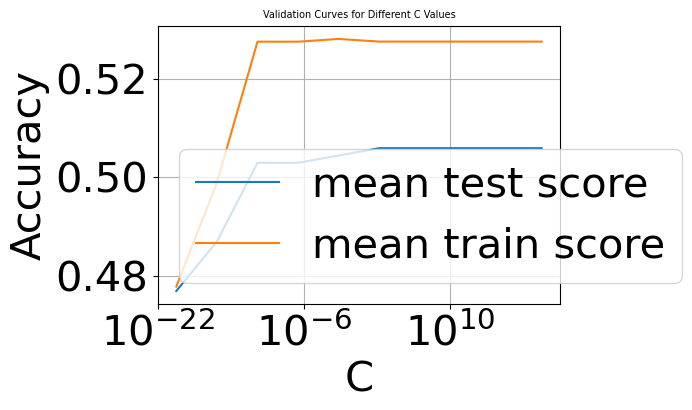

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt

# Assuming logreg_results is your DataFrame containing the validation curve results

import matplotlib.pyplot as plt

# Plot the mean test and mean train scores using a logarithmic x-axis
plt.semilogx(logreg_results['param_logreg__C'], logreg_results['mean_test_score'], label='mean test score')
plt.semilogx(logreg_results['param_logreg__C'], logreg_results['mean_train_score'], label='mean train score')

# Set labels and title
plt.ylabel('Accuracy')
plt.xlabel('C')
plt.title('Validation Curves for Different C Values',fontsize=7)
plt.legend()

# Add grid lines
plt.grid(True)

# Adjust layout for better visualization
plt.tight_layout()

# Display the plot
plt.show()


##    4. Knn-nearest neighbor Classifier with grid search function and cross validation [Applying pipeline structure]: 
*Source: Internet, https://learn.extensionschool.ch/learn/programs/applied-data-science-machine-learning-v2/subjects/k-nearest-neighbors-v2/units/k-nearest-neighbors-v2

*Source: Internet, https://stackoverflow.com/questions/57377309/ridge-regression-grid-search-with-pipeline

*Source: Internet, https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

*Source: Internet, https://python-course.eu/machine-learning/k-nearest-neighbor-classifier-with-sklearn.php

*Source: Online Book Aritifical Intelligence in Finance - p.217, splitting data test and train

*Source: Dr. Yves J. Hilpisch, Python for Algorithmic Trading, From Idea to Cloud deployment, Chp.5 Using ML for price movements, p.143

K-NN is an intuitive algorithm that works for both regression and classification tasks. It uses a distance metric and a decision function that can be adapted to the problem. Unlike linear regressions, it doesn't learn a vector ⃗w of parameters but directly uses the data to compute predictions.
There is a relationship between k and the complexity or amount of "corner cases rules" of our k-NN classifier. Note that k is a hyperparameter since we set it before applying the algorithm.

To develop a model using knn classifier in combination with grid search and cross-validation, it is necessary to split the data into training and test datasets. As different objects such as KFold/Sequential, StandardScaler, PCA (open point), and knn weighs & n neighbors are added, it is recommended to use a pipeline structure to handle the data flow more efficiently instead of looping around the data.

The pipeline structure allows for a more streamlined and organized approach to model building, making it easier to incorporate different preprocessing techniques and models. This helps in reducing the amount of code and simplifying the data processing steps.

Using the pipeline structure, it is possible to apply all the preprocessing steps to the data in a single step, and then fit the ridge regression model with the grid search and cross-validation. By doing so, we can efficiently tune the hyperparameters of the ridge regression model to improve its performance and obtain better results.

1. Create a `Pipeline` object with scaler, PCA and the KNN Classifier.

2. Tune the number of components and `k` parameter using `
GridSearchCV`

3. Plot and analyze the validation curve with `k` values on the x-axis, the test performance on the y-axis and one curve per number of components. 

4. Filtering out the important parameters to understand the robustness of the model

5. Pick all training data (fit model) and compute the probability for each class (month) using the predict_proba() and with the test data  to check the accuracy of the month-forecast-model. 

6. Plot the results for each data set.The plot needs to explain me, how accurate the model worked on the different datasets (rows) 
    

In [41]:
# conda install -c conda-forge scikit-learn https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score


In [42]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


# Create the pipeline
pipeline_knn = Pipeline([
    ('scaler', StandardScaler()),  # Preprocessing step: StandardScaler
    ('knn', KNeighborsClassifier())  # Model step: KNeighborsClassifier
])

# Define the parameter grid for grid search
param_grid = {
    'knn__n_neighbors': [3, 5, 7,10,15,20,50,60,70,100],
    'knn__weights': ['uniform', 'distance']
}

# Perform Grid Search for hyperparameter tuning
grid_search = GridSearchCV(pipeline_knn, param_grid, cv=5)
grid_search.fit(X_tr, y_tr)

knn_results = pd.DataFrame(grid_search.cv_results_)


In [43]:
# Variable to store the results
# Generate a set of k values

k_values = np.r_[1, np.arange(5, 101, step=5)]
k_values # [1 5 10 15 .. 100]

gs_results = []

# Grid search
for k in k_values:
    # Fit k-NN model
    pipeline_knn.set_params(knn__n_neighbors=k)
    pipeline_knn.fit(X_tr, y_tr)

    # Save model and its performance on train/test sets
    gs_results.append({
        'k': k,
        'train_accuracy': pipeline_knn.score(X_tr, y_tr),
        'test_accuracy': pipeline_knn.score(X_te, y_te)
    })

# Convert results to DataFrame and sort
gs_results = pd.DataFrame(gs_results)
gs_results.sort_values(by='test_accuracy', ascending=False).head()

k  train_accuracy  test_accuracy
8   40        0.581554       0.535354
9   45        0.569174       0.535354
7   35        0.580316       0.532468
10  50        0.567317       0.523088
11  55        0.562365       0.521645

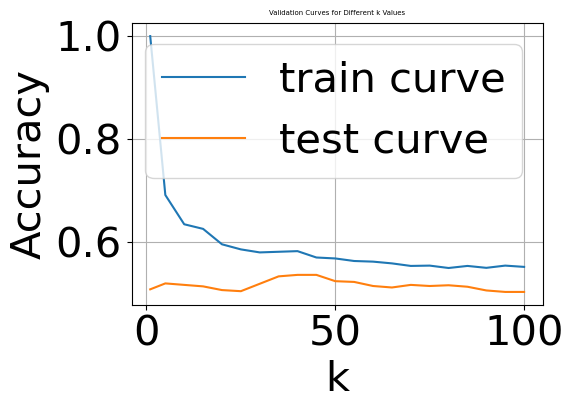

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt

#  gs_results is your DataFrame containing the validation curve results

import matplotlib.pyplot as plt

# Plot the training and testing accuracy curves
plt.plot(gs_results['k'], gs_results['train_accuracy'], label='train curve')
plt.plot(gs_results['k'], gs_results['test_accuracy'], label='test curve')

# Set labels and title
plt.ylabel('Accuracy')
plt.xlabel('k')
plt.title('Validation Curves for Different k Values', fontsize=5)
plt.legend()

# Add grid lines
plt.grid(True)

# Adjust layout for better visualization
plt.tight_layout()

# Display the plot
plt.show()


In [45]:
# applying prediction for the knn model 
df_AI['prediction_knn'] = grid_search.predict(df_AI[cols].values)

In [46]:
# calculating the number of hits for the knn model
df_AI['hits_knn'] = np.sign(df_AI['return'].iloc[lags:]*df_AI['prediction_knn'].iloc[lags:])


In [47]:
# print the accuracy of knn model 
print(accuracy_score(df_AI['prediction_knn'],np.sign(df_AI['return'])))


0.546891921160927


In [48]:
# accuracy whole time series without split test-train
df_AI['strategy_knn'] = df_AI['prediction_knn']*df_AI['return']

<Axes: xlabel='Date'>

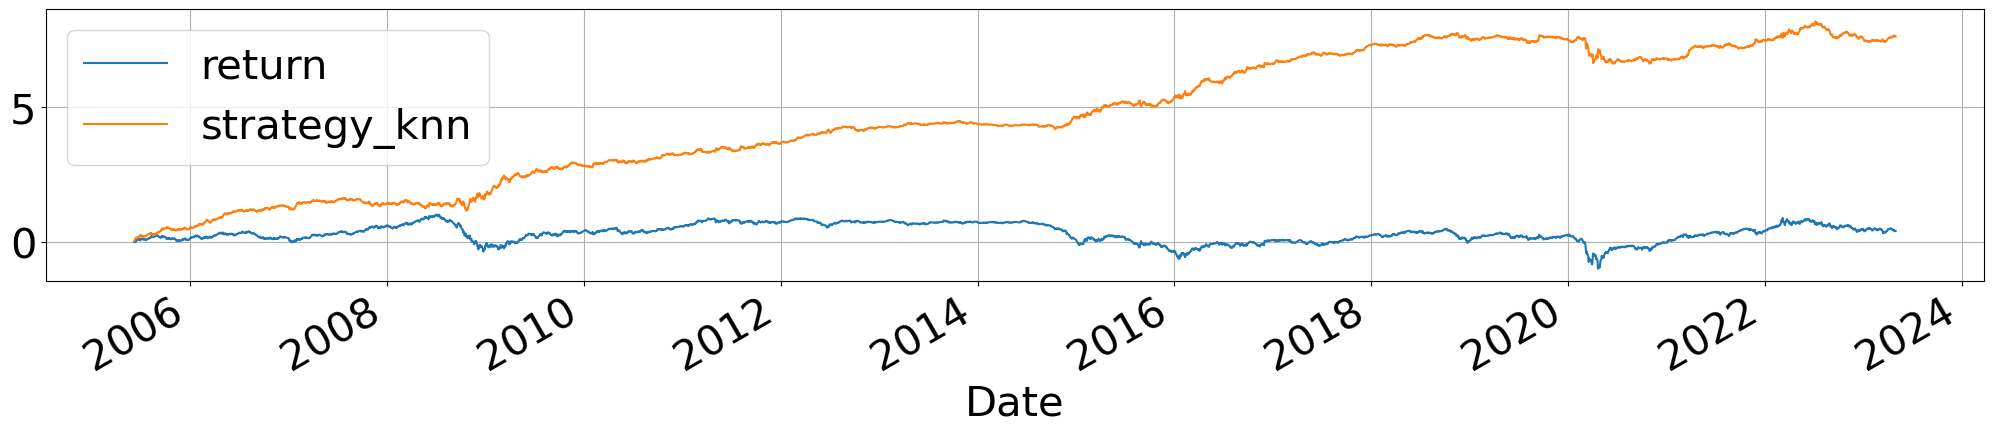

In [49]:
# plot cumulated strategy_knn and cumulated returns
df_AI[[
    'return', 
        'strategy_knn'
       ]].cumsum().plot(figsize=(25,4),grid=True)

## Comment on the comparison of Logistic regression and KNN neighbors [all the data df_AI / df_analysis Test data]

In [50]:
# Checking the dataframe head of the intermediate results
df_AI.head()

c    return  direction     lag_1     lag_2     lag_3  \
Date                                                                   
2005-06-08  52.11 -0.019385       -1.0 -0.010112 -0.009273  0.033221   
2005-06-09  53.82  0.032288        1.0 -0.019385 -0.010112 -0.009273   
2005-06-10  52.67 -0.021599       -1.0  0.032288 -0.019385 -0.010112   
2005-06-13  54.78  0.039279        1.0 -0.021599  0.032288 -0.019385   
2005-06-14  53.73 -0.019354       -1.0  0.039279 -0.021599  0.032288   

               lag_4     lag_5  prediction_lgreg  hits_lgreg  strategy_lgreg  \
Date                                                                           
2005-06-08 -0.016467  0.048856               1.0         NaN       -0.019385   
2005-06-09  0.033221 -0.016467               1.0         NaN        0.032288   
2005-06-10 -0.009273  0.033221              -1.0         NaN        0.021599   
2005-06-13 -0.010112 -0.009273               1.0         NaN        0.039279   
2005-06-14 -0.019385 -0.010112              -1.0         NaN        0.019354   

            prediction_knn  hits_knn  strategy_knn  
Date                                                
2005-06-08            -1.0       NaN      0.019385  
2005-06-09             1.0       NaN      0.032288  
2005-06-10            -1.0       NaN      0.021599  
2005-06-13             1.0       NaN      0.039279  
2005-06-14            -1.0       NaN      0.019354

In [51]:
# Accuracy on Logistic Classifier weaker than KNN approach / on all data (test&trained)
print(accuracy_score(df_AI['prediction_lgreg'],np.sign(df_AI['return'])))

# Accuracy on KNN Classifier - more precise / on all data (test&trained)
print(accuracy_score(df_AI['prediction_knn'],np.sign(df_AI['return'])))

# plot results on knn and logclassifier
df_AI[['direction',
       'prediction_knn',
       'strategy_knn',
       'prediction_lgreg',
       'strategy_lgreg']]


0.5196014728178471
0.546891921160927


direction  prediction_knn  strategy_knn  prediction_lgreg  \
Date                                                                    
2005-06-08       -1.0            -1.0      0.019385               1.0   
2005-06-09        1.0             1.0      0.032288               1.0   
2005-06-10       -1.0            -1.0      0.021599              -1.0   
2005-06-13        1.0             1.0      0.039279               1.0   
2005-06-14       -1.0            -1.0      0.019354              -1.0   
...               ...             ...           ...               ...   
2023-04-25       -1.0            -1.0      0.023977              -1.0   
2023-04-26       -1.0             1.0     -0.038879               1.0   
2023-04-27        1.0             1.0      0.008715               1.0   
2023-04-28        1.0            -1.0     -0.014819               1.0   
2023-05-01       -1.0            -1.0      0.002896              -1.0   

            strategy_lgreg  
Date                        
2005-06-08       -0.019385  
2005-06-09        0.032288  
2005-06-10        0.021599  
2005-06-13        0.039279  
2005-06-14        0.019354  
...                    ...  
2023-04-25        0.023977  
2023-04-26       -0.038879  
2023-04-27        0.008715  
2023-04-28        0.014819  
2023-05-01        0.002896  

[4617 rows x 5 columns]

In [52]:
# Split at 70% of the data 
split = int(len(df_AI
               ) * 0.7)
# allocated to train 2
train2 = df_AI.iloc[:split]

# allocated to test 2
test2 = df_AI.iloc[split:]

Models Logreg and KNN applied on Testperiod from 2017 to 2023 with 1384 data points. It is important we are testing  a sequential time series not a random choice of samples 

In [53]:
# KNN Model 
test2['test_knn']=grid_search.predict(test2[cols].values)

#Logistic Classifier
test2['test_lgreg']=grid_cv.predict(test2[cols].values)

# added the test results for KNN and Lgreg in one dataframe
df_analysis = pd.concat([test2[['test_knn','test_lgreg']],df_AI],axis=1)

# clean data 
df_analysis.dropna(inplace=True)

# quick describe data
df_analysis.describe()

C:\Users\Raphael Bruggmann\AppData\Local\Temp\ipykernel_1528\2875560500.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Raphael Bruggmann\AppData\Local\Temp\ipykernel_1528\2875560500.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



test_knn   test_lgreg            c       return    direction  \
count  1386.000000  1386.000000  1386.000000  1386.000000  1386.000000   
mean      0.118326     0.673882    70.520606     0.000163     0.113997   
std       0.993333     0.739106    19.426673     0.027646     0.991658   
min      -1.000000    -1.000000    19.330000    -0.279761    -1.000000   
25%      -1.000000     1.000000    60.842500    -0.010580    -1.000000   
50%       1.000000     1.000000    69.460000     0.002409     1.000000   
75%       1.000000     1.000000    81.175000     0.012981     1.000000   
max       1.000000     1.000000   127.980000     0.190774     1.000000   

             lag_1        lag_2        lag_3        lag_4        lag_5  \
count  1386.000000  1386.000000  1386.000000  1386.000000  1386.000000   
mean      0.000175     0.000154     0.000132     0.000175     0.000206   
std       0.027648     0.027648     0.027653     0.027638     0.027635   
min      -0.279761    -0.279761    -0.279761    -0.279761    -0.279761   
25%      -0.010580    -0.010676    -0.010708    -0.010676    -0.010580   
50%       0.002442     0.002409     0.002371     0.002409     0.002442   
75%       0.012985     0.012981     0.012981     0.012985     0.013010   
max       0.190774     0.190774     0.190774     0.190774     0.190774   

       prediction_lgreg   hits_lgreg  strategy_lgreg  prediction_knn  \
count       1386.000000  1386.000000     1386.000000     1386.000000   
mean           0.673882     0.083694       -0.000479        0.118326   
std            0.739106     0.994676        0.027642        0.993333   
min           -1.000000    -1.000000       -0.279761       -1.000000   
25%            1.000000    -1.000000       -0.011435       -1.000000   
50%            1.000000     1.000000        0.001416        1.000000   
75%            1.000000     1.000000        0.012495        1.000000   
max            1.000000     1.000000        0.136392        1.000000   

          hits_knn  strategy_knn  
count  1386.000000   1386.000000  
mean      0.063492      0.000266  
std       0.996171      0.027645  
min      -1.000000     -0.275751  
25%      -1.000000     -0.011478  
50%       1.000000      0.001030  
75%       1.000000      0.012532  
max       1.000000      0.279761

<Axes: >

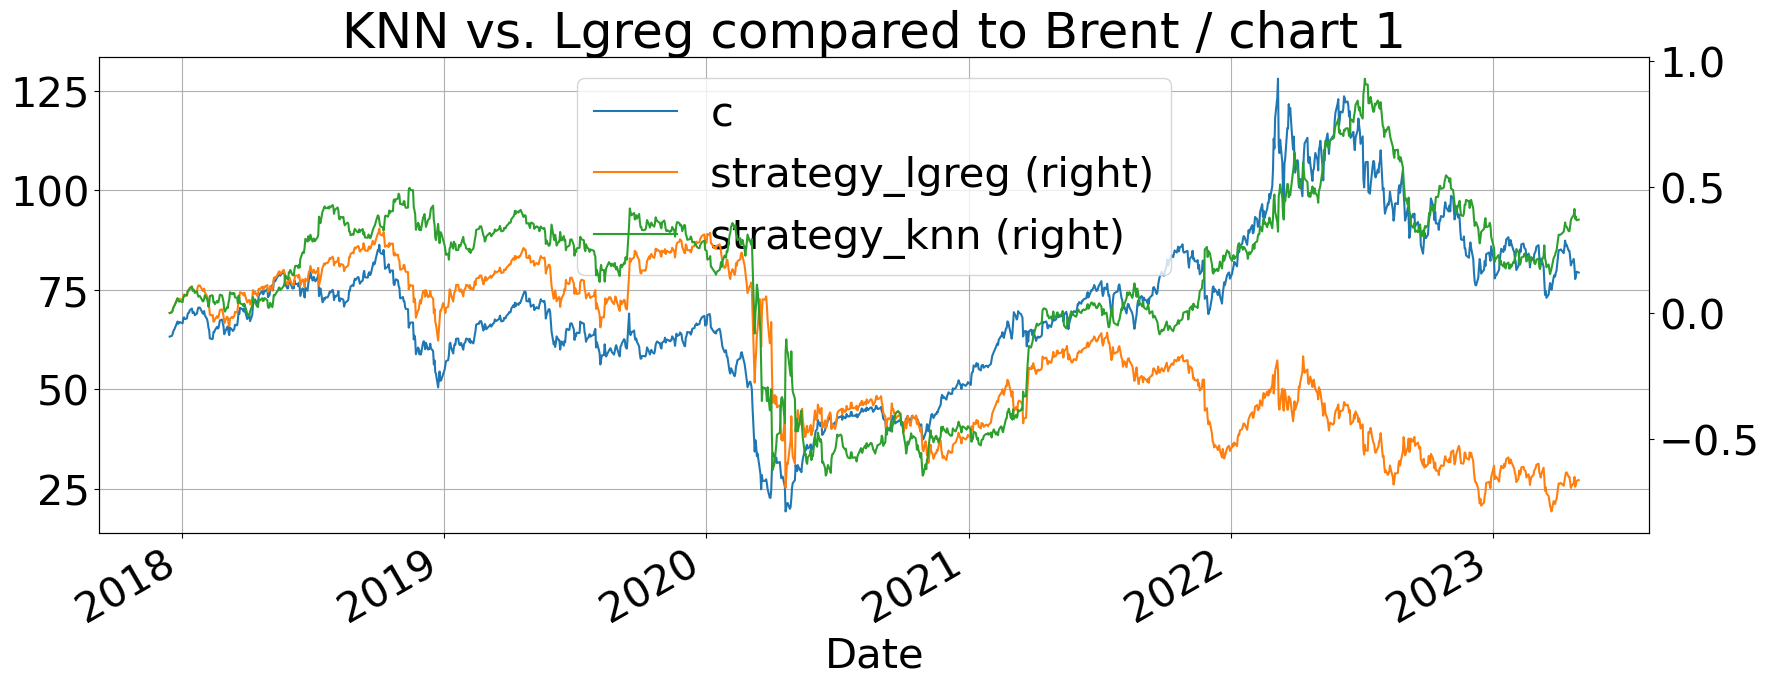

In [54]:
# Calculate strategies for logistic regression and k-nearest neighbors
df_analysis['strategy_lgreg'] = df_analysis['test_lgreg'] * df_analysis['return']
df_analysis['strategy_knn'] = df_analysis['test_knn'] * df_analysis['return']

# plot strategy for both outputs with two y-axis compared to the closing price 
ax = df_analysis[['c']].plot(figsize=(20,7), 
                             grid=True)

# Plot cumulative sum of strategies and set secondary y-axis
df_analysis[[
    'strategy_lgreg',
    'strategy_knn'
            ]].cumsum().plot(figsize=(20,7),
                             subplots=False,
                             title='KNN vs. Lgreg compared to Brent / chart 1',
                             secondary_y =True,ax=ax)

### Analysis on comparing Logistic regression with KNN Classifier

- It looks like that Logistic regression is for the test period of 2017/2023 with around 1384 data points not accurate enough
- The Logistic Classifier has a tendency to suggest long position over this pricing period (test 50.9 % accuracy and train 51.9% accuracy)
- KNN Classifier tends to remain way more accurate with a roughly 50/50% long / short strategy and gaining over this period more return
- KNN Classifier achieves over the whole Trading period an accuracy of roughly 84 % (careful here the test accuracy is not as high), whereas Logistic Classifier reaches almost 52% accuracy
- KNN Classifier on the Test data shows accuracy of max 51.8% with trains data at 58%
- strategy_lgreg remains not with much return generation compared on what strategy_knn is performing, knn strategy line is getting the trends right on the above chart 1


## 5. Neural Network models (RNN) - Simple case study 

*Source: Dr. Yves J. Hilpisch, Artificial Intelligence in Finance, Chp. 8. Recurrent Neural Networks,, p.204 - p.222

*Source: Internet, https://www.tensorflow.org/guide/keras/working_with_rnns

*Source: Book Aritifical Intelligence in Finance, RNN - p.217

We went now through sklearn libary based on Logistic classifier and KNN classifier. Let's try to do a first try on Neural Network algo trading KERAS in order to figure out if we can apply this as alternative to our previous approach. We are going to apply RNN first based on the returns of the specific instrument while splitting the data into test and training data.The lagging process and the normalization is as well integrated afterwards we convert it to direction with -/+ 

In [55]:
# Creating RNN dataframe out of raw data
df_RNN = raw[['c','return']].copy()

# Creating direction sign -1 and +1
df_RNN['direction'] = np.sign(df_RNN['return'])

# Clean dataframe
df_RNN.dropna(inplace=True)

# List of features in data set
features = list(df_RNN.columns)


In [56]:
import tensorflow as tf
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import SimpleRNN, LSTM, Dense

In [57]:
# Creating simple RNN model and summarize
model = create_rnn_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 100)               10200     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 10,301
Trainable params: 10,301
Non-trainable params: 0
_________________________________________________________________
None


In [58]:
# Data import for RNN Model 3d Data - only return

df_AI3 =(df_RNN - df_RNN.mean()) / df_RNN.std()
r = df_AI3['return'].values
r = r.reshape((len(r), -1))


In [59]:
# Applying Timeseries generator for the returns with batch size of 5 and lag 5
lags = 5
g_all = TimeseriesGenerator(r, r, length=lags, batch_size=5)
print(g_all)

In [60]:
set_seeds()
model = create_rnn_model()

In [61]:
# fit the model based on Timeseries generator
model.fit(g_all, epochs=500, steps_per_epoch=10,
          verbose=False)

# prediction of the simple model on y variable
y = model.predict(g_all, verbose=False)

In [62]:
# Creating new column for the RNN results
df_RNN['prediction_rnn1'] = np.nan

# adding the forecast into new dataframe
df_RNN['prediction_rnn1'].iloc[lags:] = y.flatten()

# adding directional sign +1 -1 for the forecast 
df_RNN['prediction_rnn2'] = np.sign(df_RNN['prediction_rnn1'])

# cleaning dataframe
df_RNN.dropna(inplace=True)


In [63]:
# print model performance accuracy 
print(accuracy_score(np.sign(df_RNN['return']), np.sign(df_RNN['prediction_rnn1'])))

0.5278319254927442


In [64]:
# accuracy whole time series without split test-train
df_RNN['strategy_rnn2'] = df_RNN['prediction_rnn2']*df_RNN['return']

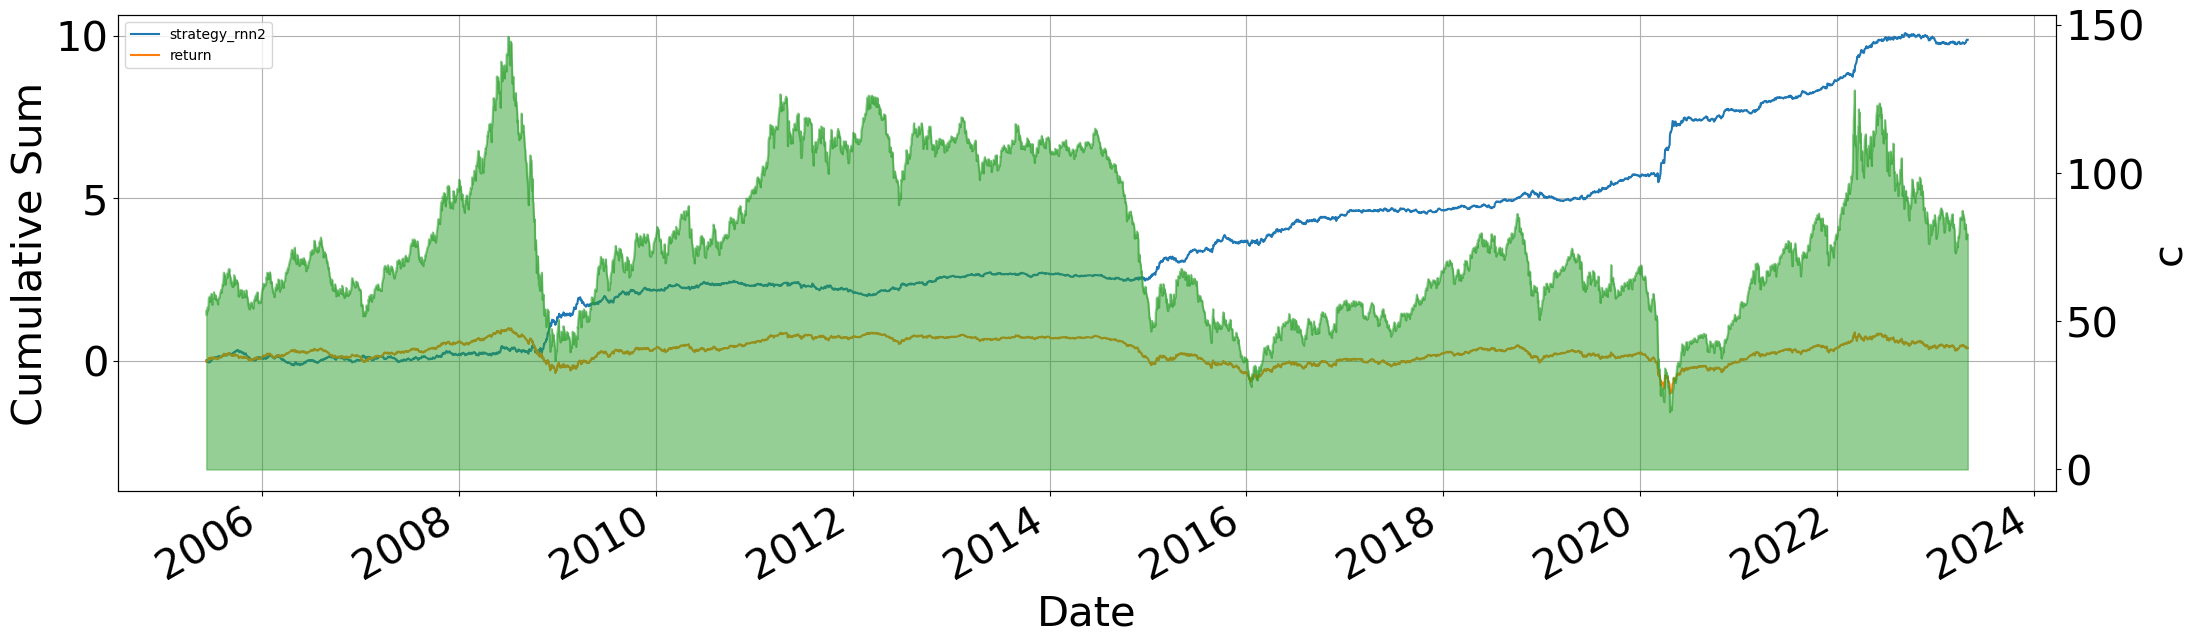

In [65]:
#  df_RNN is your DataFrame containing the "RNN" data for plotting

import matplotlib.pyplot as plt

# Plotting the cumulative sum of 'strategy_rnn2' and 'return' columns
ax = df_RNN[['strategy_rnn2', 'return']].cumsum().plot(figsize=(25, 7), grid=True)

# Plotting the 'c' column as an area plot with a secondary y-axis
df_RNN[['c']].plot(kind='area', figsize=(25, 7), secondary_y=True, ax=ax, alpha=0.5)

# Adding labels to the y-axes
ax.set_ylabel('Cumulative Sum')  # Left y-axis
ax.right_ax.set_ylabel('c')       # Right y-axis

# Setting a more negative x-axis limit for the primary y-axis
ax.set_ylim([-4, None])  # Change -100 to your desired limit

# Adding a legend
ax.legend(loc='upper left', labels=['strategy_rnn2', 'return', 'c'], fontsize=10)

# Display the plot
plt.show()



In [66]:
# check the dataframe with the results
df_RNN.head()

c    return  direction  prediction_rnn1  prediction_rnn2  \
Date                                                                       
2005-06-08  52.11 -0.019385       -1.0        -0.029033             -1.0   
2005-06-09  53.82  0.032288        1.0        -0.028647             -1.0   
2005-06-10  52.67 -0.021599       -1.0         0.092910              1.0   
2005-06-13  54.78  0.039279        1.0         0.113022              1.0   
2005-06-14  53.73 -0.019354       -1.0        -0.012621             -1.0   

            strategy_rnn2  
Date                       
2005-06-08       0.019385  
2005-06-09      -0.032288  
2005-06-10      -0.021599  
2005-06-13       0.039279  
2005-06-14       0.019354

# 6. Recurrent Neural Network (RNN) with Financial Features and data Split (train/Test)
### Splitting Data into training and test data and Applying additional Feature with the help of Subtractions_of_combination function


In [67]:
from formula_collection import *

# Creating dataframe with basic inputs ohlcv, returns
df_RNN2 = raw[['o','h','l','c','volume','return']].copy()
df_RNN2.dropna(inplace=True)

In [68]:
# adding as well the intertool for permutations  / libary: from itertools import permutations / import itertools
df_p = subtractions_of_combinations(df_RNN2[['o','h','l','c']])

# Combination of the additional featues with normal inputs 
df_RNN3 = pd.concat([df_RNN2,df_p],axis=1)

#adding features on the list - all columns from df_RNN3
features2 = list(df_RNN3.columns)

In [69]:
df_RNN3.dropna(inplace=True)

In [70]:
# data split on 80 percent
split2 = int(len(df_RNN3
               ) * 0.8)

# defining train, normalizing, test
train2 = df_RNN3.iloc[:split2].copy()
mu2, std2 = train2.mean(), train2.std()
train2 = (train2 - mu2) / std2 

# defining test variable
test2 = df_RNN3.iloc[split2:].copy()
test2 = (test2 - mu2) / std2 #normaliesierung raus

# Printing the shape to check if for model run no frictions or errors
print('Train:', train2.shape)
print('Test:', test2.shape)
print('all:', df_RNN3.shape)


Train: (3697, 12)
Test: (925, 12)
all: (4622, 12)


In [71]:
# train2 variable cut it correctly with split2 - transformation work 
train2 = df_RNN3.iloc[:split2].copy()
train2

o      h      l      c  volume    return  o__h  o__l  o__c  \
Date                                                                         
2005-06-01  50.85  53.46  50.85  53.27   59033  0.048856 -2.61  0.00 -2.42   
2005-06-02  53.05  53.97  52.26  52.40   60690 -0.016467 -0.92  0.79  0.65   
2005-06-03  52.39  54.24  52.39  54.17   49014  0.033221 -1.85  0.00 -1.78   
2005-06-06  54.30  54.62  53.12  53.67   47082 -0.009273 -0.32  1.18  0.63   
2005-06-07  53.65  53.90  52.72  53.13   58501 -0.010112 -0.25  0.93  0.52   
...           ...    ...    ...    ...     ...       ...   ...   ...   ...   
2019-09-24  64.40  64.60  62.30  63.10  216276 -0.026122 -0.20  2.10  1.30   
2019-09-25  62.44  62.81  61.23  62.39  201466 -0.011316 -0.37  1.21  0.05   
2019-09-26  62.58  62.92  61.45  62.74  115573  0.005594 -0.34  1.13 -0.16   
2019-09-27  62.48  62.75  60.76  61.91   97328 -0.013317 -0.27  1.72  0.57   
2019-09-30  62.24  62.24  60.73  60.78   22010 -0.018421  0.00  1.51  1.46   

            h__l  h__c  l__c  
Date                          
2005-06-01  2.61  0.19 -2.42  
2005-06-02  1.71  1.57 -0.14  
2005-06-03  1.85  0.07 -1.78  
2005-06-06  1.50  0.95 -0.55  
2005-06-07  1.18  0.77 -0.41  
...          ...   ...   ...  
2019-09-24  2.30  1.50 -0.80  
2019-09-25  1.58  0.42 -1.16  
2019-09-26  1.47  0.18 -1.29  
2019-09-27  1.99  0.84 -1.15  
2019-09-30  1.51  1.46 -0.05  

[3697 rows x 12 columns]

In [72]:
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import SimpleRNN, LSTM, Dense

lags2=5

# Applying timeseries generator on the trained values 
g2 = TimeseriesGenerator(train2.values, train2['return'].values, 
                         length=lags2, batch_size=5)
# prediction for test data 
g2_ = TimeseriesGenerator(test2.values, test2['return'].values,
                          length=lags2, batch_size=5)


In [73]:
set_seeds()

# model creation rnn with simple RNN
model_rnn = create_rnn_model(hu=100, features=len(df_RNN3.columns),
                          layer='SimpleRNN')

#Model fitting on the g2 data out of the TS Generator train
model_rnn.fit(g2, 
                    epochs=100, steps_per_epoch=10,
          verbose=False
                   )

In [74]:
# Setting up the train table with the predcition on train data
train_df = pd.DataFrame(train2.index)
new_train_rnn = train_df[lags2:]

# Check the result with the train data and add it in a new DataFrame - please add as well returns 
new_train_rnn['predict_rnn_train_d'] = np.where(model_rnn.predict(g2).flatten()<0,-1,1)

# predict based on model_rnn for train data 
new_train_rnn['predict_rnn_train_r'] = model_rnn.predict(g2).flatten()

#indexation of the Date for train data prediction
new_train_rnn.set_index('Date', inplace=True)

 54/739 [=>............................] - ETA: 1s

C:\Users\Raphael Bruggmann\AppData\Local\Temp\ipykernel_1528\785199325.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



739/739 [==============================] - 1s 2ms/step


C:\Users\Raphael Bruggmann\AppData\Local\Temp\ipykernel_1528\785199325.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [75]:
# Setting up the new Dataframe for the RNN outputs
df_train_rnn = pd.concat([new_train_rnn,train2,raw.add_suffix('_raw')],axis=1)

# cleaning the rnn data 
df_train_rnn.dropna(inplace=True)

In [76]:
# transform to direction from the model output binary -1 and 1 (long or short)
df_train_rnn['direction'] = np.where(df_train_rnn['return']>0,1,-1)

# strategy on the Train data 
df_train_rnn['strategy_rnn'] = df_train_rnn['predict_rnn_train_d']*df_train_rnn['return']

In [77]:
# accuracy score on the test data 
print(accuracy_score(np.sign(test2['return'].iloc[lags2:]), np.sign(model_rnn.predict(g2_).flatten())))

# Setting up the train table with the predcition on train data
test_df = pd.DataFrame(test2.index)
new_test_rnn = test_df[lags2:]

# Check the result with the train data and add it in a new DataFrame - please add as well returns 
new_test_rnn['predict_rnn_test_d'] = np.where(model_rnn.predict(g2_).flatten()<0,-1,1)
new_test_rnn['predict_rnn_test_r'] = model_rnn.predict(g2_).flatten()

#Datetime indexation
new_test_rnn.set_index('Date', inplace=True)

# New data frame concat 
df_test_rnn = pd.concat([new_test_rnn,test2,raw.add_suffix('_raw')],axis=1)

# Clean data nan
df_test_rnn.dropna(inplace=True)

# binary direction -1 or 1 - long or short 
df_test_rnn['direction'] = np.where(df_test_rnn['return']>0,1,-1)

# strategy on the Train data 
df_test_rnn['strategy_rnn'] = df_test_rnn['predict_rnn_test_d']*df_test_rnn['return']

# cross check the columns in the df
df_test_rnn.columns

184/184 [==============================] - 0s 2ms/step
0.5
184/184 [==============================] - 0s 2ms/step


C:\Users\Raphael Bruggmann\AppData\Local\Temp\ipykernel_1528\3766859374.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



184/184 [==============================] - 0s 2ms/step


C:\Users\Raphael Bruggmann\AppData\Local\Temp\ipykernel_1528\3766859374.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Index(['predict_rnn_test_d', 'predict_rnn_test_r', 'o', 'h', 'l', 'c',
       'volume', 'return', 'o__h', 'o__l', 'o__c', 'h__l', 'h__c', 'l__c',
       'c_raw', 'o_raw', 'l_raw', 'h_raw', 'volume_raw', 'return_raw',
       'vola_raw', 'mom_raw', 'sma_raw', 'min_raw', 'max_raw', 'direction',
       'strategy_rnn'],
      dtype='object')

### Comment on RNN models (5. and 6. chapter) - Simple vs. Split-test-train plus feature engineering

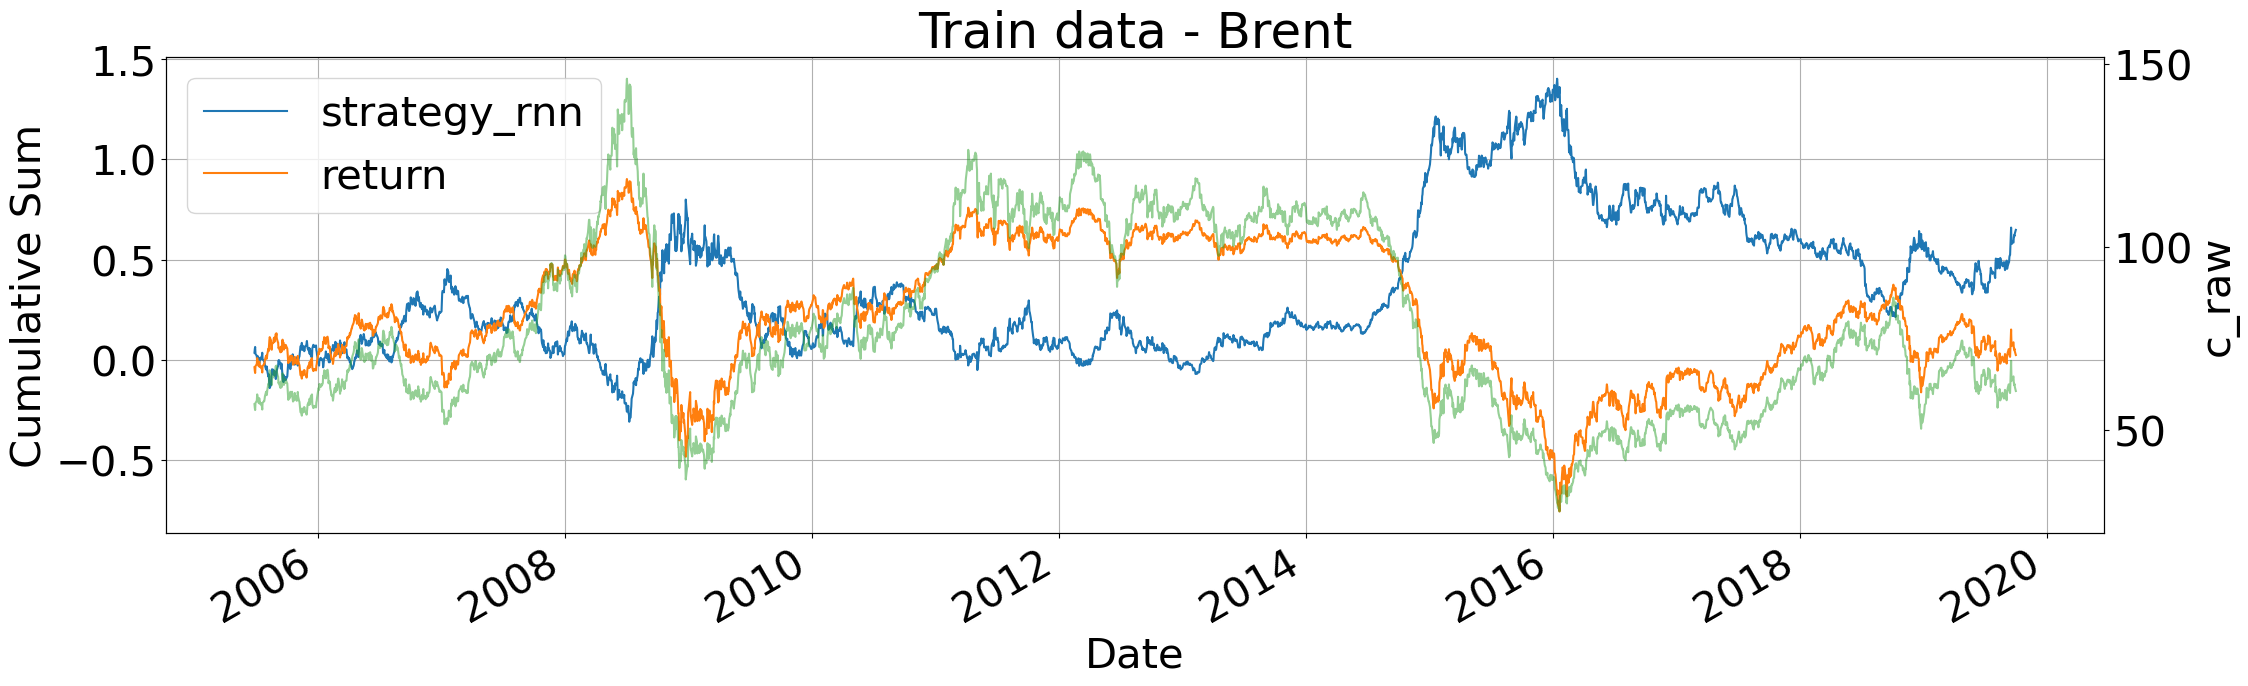

In [78]:
#  df_train_rnn is your DataFrame containing the data for plotting

import matplotlib.pyplot as plt

# Plotting the cumulative sum of 'strategy_rnn' and 'return' columns
ax = df_train_rnn[['strategy_rnn', 'return']].cumsum().plot(figsize=(25, 7), grid=True, title='Train data - Brent')

# Plotting the 'c_raw' column with a secondary y-axis
df_train_rnn[['c_raw']].plot(kind='line', figsize=(25, 7), secondary_y=True, ax=ax, alpha=0.5)

# Adding labels to the y-axes
ax.set_ylabel('Cumulative Sum')  # Left y-axis
ax.right_ax.set_ylabel('c_raw')   # Right y-axis

# Adding a legend
ax.legend(loc='upper left', labels=['strategy_rnn', 'return', 'c_raw'])

# Display the plot
plt.show()

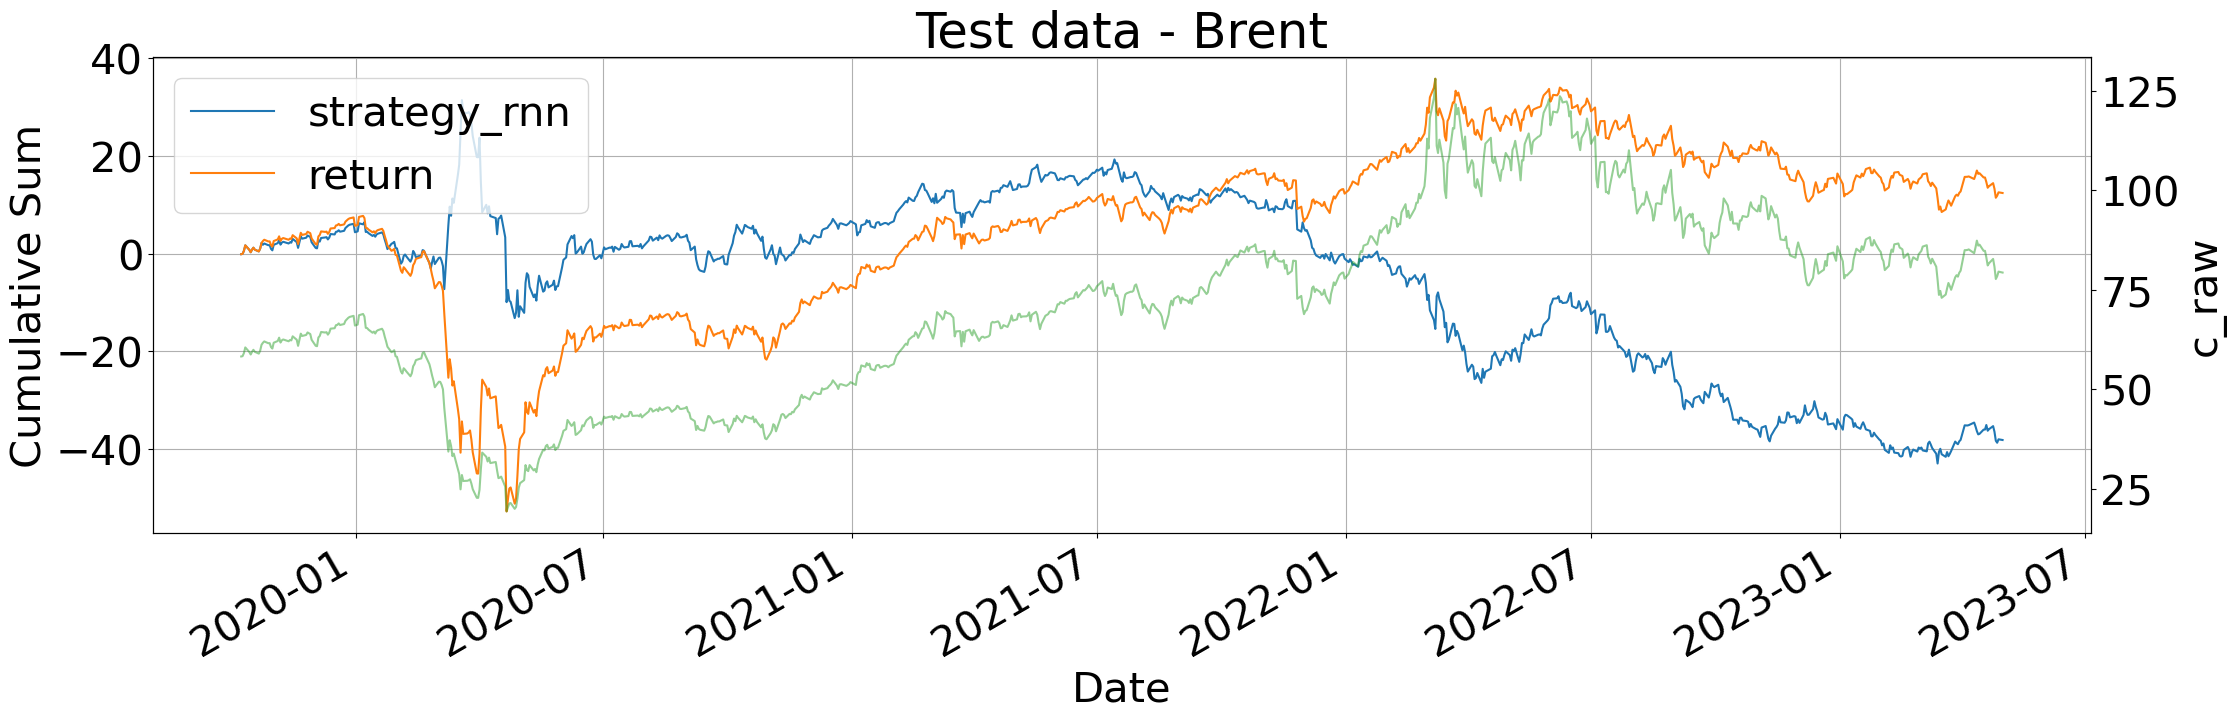

In [79]:
#  df_test_rnn is your DataFrame containing the test data for plotting

import matplotlib.pyplot as plt

# Plotting the cumulative sum of 'strategy_rnn' and 'return' columns
ax = df_test_rnn[['strategy_rnn', 'return']].cumsum().plot(figsize=(25, 7), grid=True, title='Test data - Brent')

# Plotting the 'c_raw' column with a secondary y-axis
df_test_rnn[['c_raw']].plot(kind='line', figsize=(25, 7), secondary_y=True, ax=ax, alpha=0.5)

# Adding labels to the y-axes
ax.set_ylabel('Cumulative Sum')  # Left y-axis
ax.right_ax.set_ylabel('c_raw')   # Right y-axis

# Adding a legend
ax.legend(loc='upper left', labels=['strategy_rnn', 'return', 'c_raw'])

# Display the plot
plt.show()


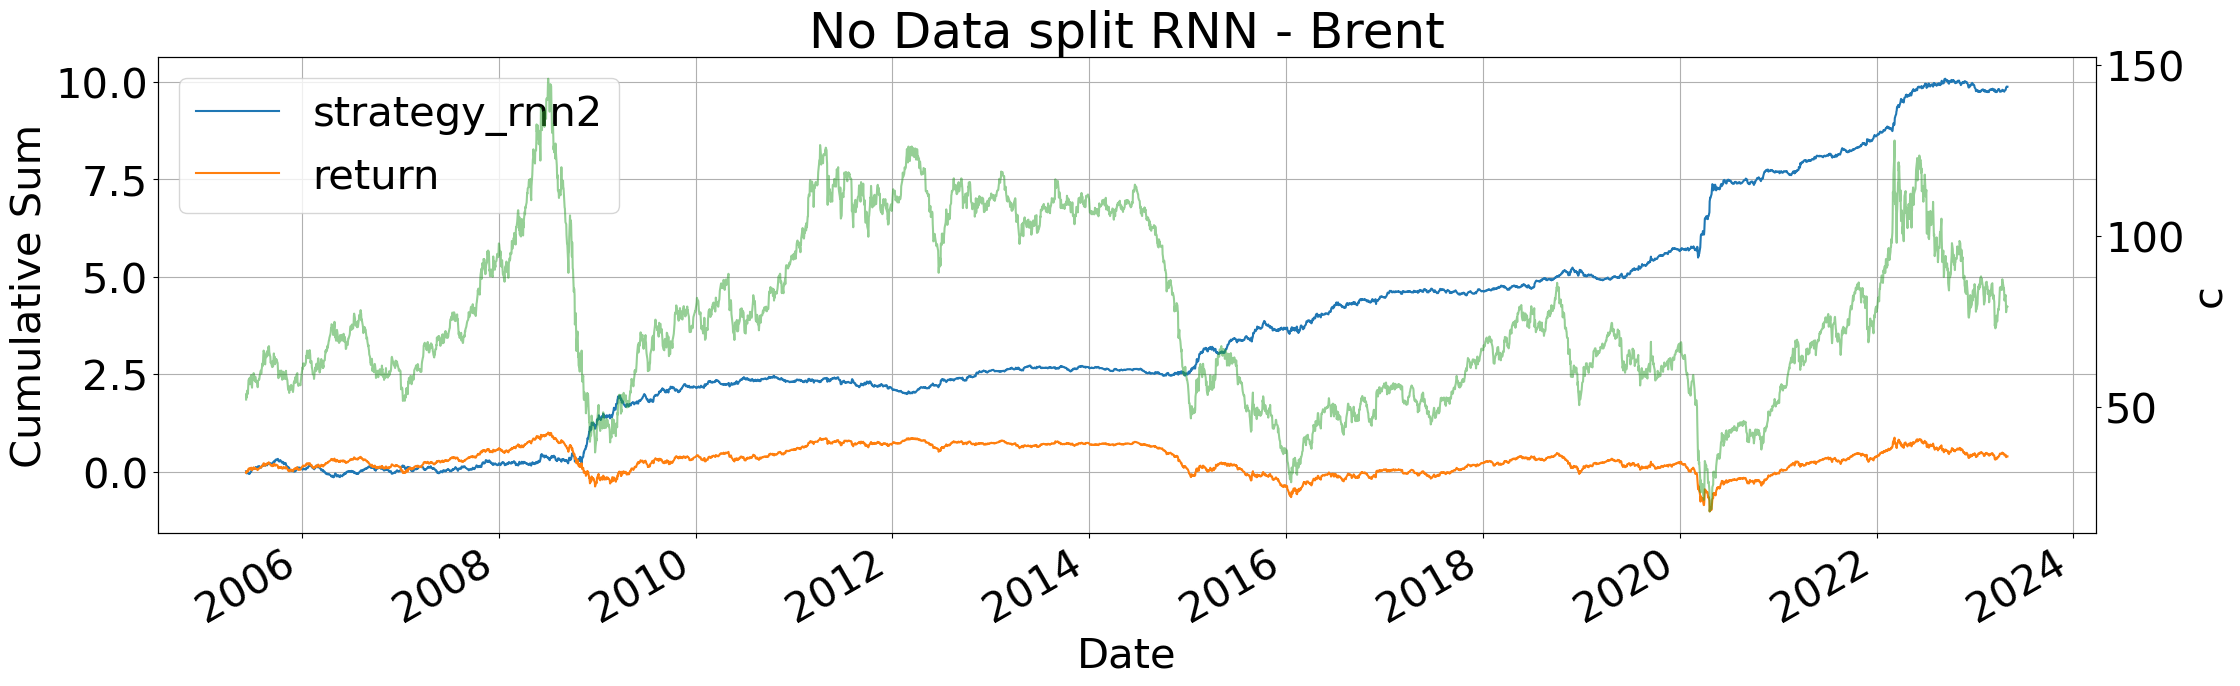

In [80]:
# df_RNN is your DataFrame containing the "no train" or "no test" data for plotting

import matplotlib.pyplot as plt

# Plotting the cumulative sum of 'strategy_rnn2' and 'return' columns
ax = df_RNN[['strategy_rnn2', 'return']].cumsum().plot(figsize=(25, 7), grid=True, title='No Data split RNN - Brent')

# Plotting the 'c' column with a secondary y-axis
df_RNN[['c']].plot(kind='line', figsize=(25, 7), secondary_y=True, ax=ax, alpha=0.5)

# Adding labels to the y-axes
ax.set_ylabel('Cumulative Sum')  # Left y-axis
ax.right_ax.set_ylabel('c')       # Right y-axis

# Adding a legend
ax.legend(loc='upper left', labels=['strategy_rnn2', 'return', 'c'])

# Display the plot
plt.show()


### Comment on RNN Brent strategy for train/test split and on complete data (No data splti) set 2005/2023 
- Looks like while applying more features with the help of subtractions_of_combinations function helps not really on a significant level (RNN test 52.8%, no split 52.9%) 
- But this is unfortunately not really a game changer - Test data for Brent are overall losing money for 2020/2023 besides the fact that RNN test is at 52.8% accuracy 
- Adding no Data split for RNN - algo is trend wise gaining value over the whole period of 2006/2023 but this is not really estonishing since we do the fitting over the whole period 2005 to 2023
- As a next step I would like to implement with the help of Object Oriented programming DNN, where part of the code sample is coming out from the sample exam provided by Hilpisch

# 7. DNN Network models with Object Oriented programming 


#### Neural network model RNN - simple [Applying helper function]
*Source: Dr. Yves J. Hilpisch, Artificial Intelligence in Finance, The AI Machine, Chp.8 Recurrent Neural Network, p.204 - p.220

*Source: Dr. Yves J. Hilpisch, Python for Algorithmic Trading, From Idea to Cloud deployment, Chp.5 Predicting Market Movements with ML, p.153 - p.173

*Source: https://bit.ly/tpq_sfp , Sample exam DNN 

Dense Neural Networks (DNNs) is a network which is based on connected layers, each of the neurons in a layer feed into all of the neurons in the next layer.

Based on the Keras package, we will make use of the Sequential() model which enables us to build a model as a linear stack of layers. The model itself will consist of Dense layers and Dropout layers.

Except for the final layer, the Dense layers use the relu activation function. An activation function is critical in order to allow the layers to learn non-linear transformations of the input data.

The Dropout layers are used to avoid overfitting and achieve this by randomly zeroing a percentage of the inputs received from the previous layer.

The final Dense layer has 1 neuron because the purpose of our model is to classify the directional movement as either up or down. We make use of the sigmoid activation function which will force the output to be between 0 and 1 (we consider 0 as a downwards directional movement prediction and 1 as an upwards directional movement prediction).

When compiling the model using the .compile() method, we choose the following arguments:

Optimizer: we make use of the commonly used Adagrad optimizer
Loss function: because this is a classification problem, with a probability output, the recommended loss function is binary_crossentropy
Metrics: we will monitor the accuracy of our training

#### DNN model 

In [81]:
import os
# Prevents using GPU, in order to reproduce results
os.environ['CUDA_VISIBLE_DEVICES'] = ''

# Import packages and set pseudorandom number seeds
import random as rn
import tensorflow as tf

# Set seed value
seed = 1

# Set numpy random seed
np.random.seed(seed)

# Set random random seed
rn.seed(seed)

# Set tensorflow random seed
tf.random.set_seed(seed)

# Make results single-threaded, in order to reproduce results
config = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1,
                                  inter_op_parallelism_threads=1)

with tf.compat.v1.Session(config=config) as sess:
    pass

In [82]:
import math
import scipy.stats as scs
import time
from pylab import plt, mpl

plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

C:\Users\Raphael Bruggmann\AppData\Local\Temp\ipykernel_1528\3836020728.py:6: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



In [83]:
# Import Keras package used for building neural networks
from keras.models import Sequential
from keras.layers import Dense, Dropout, SimpleRNN, Conv1D, MaxPooling1D, Flatten
from keras.initializers import random_normal
from keras.callbacks import ModelCheckpoint


In [84]:
from formula_collection import *
import pandas as pd

data = raw[['o','h','l','c','volume',
            'return']].copy()

# Daily directional movement
# binary 0 or 1 --> for translation afterwards -1 or +1
data['d'] = np.where(data['return'] > 0, 1, 0) 

# Delete data rows with nan values
data.dropna(inplace=True)

In [85]:
# Simple Moving Averages
# 2 week
data['sma14'] = data['l'].rolling(14).mean()

# 2 month
data['sma60'] = data['l'].rolling(60).mean()

# Rolling Volatility (annualized assuming 365 trading days)
# 2 week
data['vol14'] = data['return'].rolling(14).std() * np.sqrt(365)

# 2 month
data['vol60'] = data['return'].rolling(60).std() * np.sqrt(365)

# Bollinger Bands
# 20 day simple moving average
data['sma20'] = data['l'].rolling(20).mean()

# Upper band
data['b_upper'] = data['sma20'] + 2 * data['sma20'].rolling(20).std()

# Lower band
data['b_lower'] = data['sma20'] - 2 * data['sma20'].rolling(20).std()

# Delete Volume column
data.drop(['volume'], axis=1, inplace=True)

# Delete data rows with nan values
data.dropna(inplace=True)

In [86]:
# List of features in data set
features = list(data.columns)

# Features that will not be normalized
exclude = ['r', 'd', 'vol14', 'vol60']

In [87]:
# 80% train/test split
split = int(len(data) * 0.8)

# 15% validation partition
val_size = int(split * 0.15)

# Create train data set
train = data.iloc[:split]

# Calculate train data mean
mu = train.mean()

# Calculate train data standard deviation
std = train.std()

In [88]:
# Number of days lagged data to use for each sample
lags = 5

# Empty list to store feature column names
cols = []

# For each feature
for f in features:
    for lag in range(1, lags + 1):
        # Name column
        col = f'{f}_lag_{lag}'
        if f not in exclude:
            # Lag feature and normalize using mu and std previously calculated
            data[col] = normalize(data[f].shift(lag), mu[f], std[f])
        else:
            # Lag feature
            data[col] = data[f].shift(lag)
        # Append feature column name to cols
        cols.append(col)
        
# Drop nan values
data.dropna(inplace=True)

In [89]:
# Train data prior to validation split
train = data.iloc[:split].copy()

# Validation data
val = train[-val_size:]

# Train data after validation split
train = train[:-val_size]

# Test data
test = data.iloc[split:].copy()

We define a build_dnn() function to build a DNN model in Keras with a specified number of hidden layers (hidden_layers), each with a specified number of neurons (neurons) and a dropout percentage (drop_pct). The function returns the compiled model.

In [90]:
from formula_collection import *
def build_dnn(name, neurons=64, hidden_layers=1, drop_pct=0):
    # Reset random seeds to reproduce results
    reset_random_seeds()
    # Name the model
    model = Sequential(name=name)

    # Hidden layer which specifies input shape
    model.add(Dense(neurons, activation='relu',
                    kernel_initializer=random_normal(seed=seed),
                    input_shape=(len(cols),)))

    # If specified, dropout layer to reduce overfitting
    if drop_pct > 0:
        model.add(Dropout(rate=drop_pct, seed=seed))

    # If specified, additional hidden layers added
    if hidden_layers > 1:
        for _ in range(1, hidden_layers):
            model.add(Dense(neurons, activation='relu',
                            kernel_initializer=random_normal(seed=seed)))
            # If specified, dropout layer to reduce overfitting
            if drop_pct > 0:
                model.add(Dropout(rate=drop_pct, seed=seed))

    # Final layer with 1 neuron uses sigmoid to output a scalar between 0 and 1
    model.add(Dense(1, activation='sigmoid',
                    kernel_initializer=random_normal(seed=seed)))
    # Model is compiled
    model.compile(optimizer='Adagrad',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [91]:
# Function to reset random seeds
def reset_random_seeds():
    # Reset the numpy random seed
    np.random.seed(seed)
    # Reset the random random seed
    rn.seed(seed)
    # Reset the tensorflow random seed
    tf.random.set_seed(seed)

In [92]:
# Create 4 Dense Neural Networks (DNNs) with different hyperparameters

# 32 neurons, 2 hidden layers
DNN1 = build_dnn('DNN1', 32, 2, 0.2)

# 64 neurons, 2 hidden layers
DNN2 = build_dnn('DNN2', 64, 2, 0.4)

# 128 neurons, 3 hidden layers
DNN3 = build_dnn('DNN3', 128, 3, 0.5)

# 256 neurons, 4 hidden layers
DNN4 = build_dnn('DNN4', 256, 4, 0.6)

In [93]:

# Create a list of the 4 DNNs
DNN_models = [DNN1, DNN2, DNN3, DNN4]


In [94]:
DNN4.summary()

Model: "DNN4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 256)               16896     
                                                                 
 dropout_7 (Dropout)         (None, 256)               0         
                                                                 
 dense_14 (Dense)            (None, 256)               65792     
                                                                 
 dropout_8 (Dropout)         (None, 256)               0         
                                                                 
 dense_15 (Dense)            (None, 256)               65792     
                                                                 
 dropout_9 (Dropout)         (None, 256)               0         
                                                                 
 dense_16 (Dense)            (None, 256)               65792  

Prior to training the model, we create 2 helper functions below:

fit() takes arguments of:

- model - the model to be trained
- network - the type of network
- n_epochs - the number of epochs for training
- repeat - the number of times to repeat the process


The inclusion of repeat is to demonstrate how one might account for the stochastic nature of the training of neural networks. The fit() function will repeat the training process repeat times and calculate average metrics. So in total the model is trained n_epochs * repeat times. This allows for a more robust comparison of performance between hyperparameters and networks.

A callback function is also included: we make use of ModelCheckpoint, which saves the weights that give the highest accuracy during training.

The function returns a DataFrame with the average metrics.

In [95]:
def fit(model, network, n_epochs, repeat):
    # Create empty DataFrame and lists
    sample_res = pd.DataFrame()
    mean_val_loss = []
    mean_val_acc = []
    mean_loss = []
    mean_acc = []

    # Repeat fit process
    for i in range(1, repeat + 1):
        # Reset random seeds to reproduce results
        reset_random_seeds()
        # Check model type and then use appropriate input dimensions
        if network == 'DNN':
            # Use 2 dimensional input data
            model.fit(train[cols], train['d'],
                      epochs=n_epochs, batch_size=32, verbose=False,
                      validation_data=(val[cols], val['d']),
                      shuffle=False)
        elif network in ['RNN', 'CNN', 'CNN_RNN']:
            # Use 3 dimensional input data
            model.fit(train_3d, train['d'],
                      epochs=n_epochs, batch_size=32, verbose=False,
                      validation_data=(val_3d, val['d']),
                     )

        # Store individual results
        individual_res = pd.DataFrame(model.history.history)
        individual_res.rename(columns={'val_loss': f'{i}_val_loss',
                                       'val_accuracy': f'{i}_val_acc',
                                       'loss': f'{i}_loss',
                                       'accuracy': f'{i}_acc'},
                              inplace=True)

        # Add column names to be used in sample mean calculations
        mean_val_loss.append(f'{i}_val_loss')
        mean_val_acc.append(f'{i}_val_acc')
        mean_loss.append(f'{i}_loss')
        mean_acc.append(f'{i}_acc')

        # Concatenate individual results with sample results
        sample_res = pd.concat([sample_res, individual_res], axis=1)

        if i % 10 == 0:
            print(f'{i}/{repeat} iterations of {n_epochs} epochs run')

    # Calculate mean values across all samples for val_loss, val_acc, loss, acc
    sample_res[f'{model.name}_mean_val_loss'] = sample_res[
        mean_val_loss].mean(axis=1)
    sample_res[f'{model.name}_mean_val_acc'] = sample_res[
        mean_val_acc].mean(axis=1)
    sample_res[f'{model.name}_mean_loss'] = sample_res[
        mean_loss].mean(axis=1)
    sample_res[f'{model.name}_mean_acc'] = sample_res[
        mean_acc].mean(axis=1)

    # Create DataFrame with mean results
    mean_res = pd.DataFrame(sample_res[[f'{model.name}_mean_val_loss',
                                        f'{model.name}_mean_val_acc',
                                        f'{model.name}_mean_loss',
                                        f'{model.name}_mean_acc']])

    return mean_res

fit_models() takes arguments of:

- network - the type of network
- models - the list of models with different hyperparameter tunings
- n_epochs - the number of epochs for training (by default we set this to 40 epochs)


For each model in models, the function calls the fit() function. Note that since we have fixed the random seeds in this jupyter notebook (to allow readers to reproduce the findings); repeat is set to 1.

The function prints the maximum accuracy (the weights of which will be saved by the ModelCheckpoint) and the final accuracy after 40 epochs. We also make use of the time package to record the time taken to train each model.

Finally, the function returns a DataFrame with the average metrics of each model in models.

In [96]:
def fit_models(network, models=[], n_epochs=40):

    # Empty DataFrame to store results
    res = pd.DataFrame()

    # Iterate through different hyperparameter tunings
    for model in models:
        print(f'Model: {model.name}')
        # Start time of model training
        start_time = time.time()
        results = fit(model, network, n_epochs, 1)
        
        # Print run time, maximum accuracy and final accuracy
        print('Run time: %s seconds' % round((time.time() - start_time), 2))
        print('Max Accuracy: '
              + str(results[f'{model.name}_mean_val_acc'].max()))
        print('Final Accuracy: '
              + str(results.iloc[-1][f'{model.name}_mean_val_acc']))
        
        # Concatenate results to res DataFrame
        res = pd.concat([res, results], axis=1)
        print('=' * 33)

    return res

In [97]:
# fitting the model with variable inputs of DNN1 to DNN4
DNN_results = fit_models(network='DNN', models=DNN_models)


Model: DNN1
Run time: 8.14 seconds
Max Accuracy: 0.4917733073234558
Final Accuracy: 0.4917733073234558
Model: DNN2
Run time: 8.62 seconds
Max Accuracy: 0.542961597442627
Final Accuracy: 0.542961597442627
Model: DNN3
Run time: 10.66 seconds
Max Accuracy: 0.5667275786399841
Final Accuracy: 0.5027422308921814
Model: DNN4
Run time: 18.27 seconds
Max Accuracy: 0.5338208675384521
Final Accuracy: 0.5283364057540894


In [98]:
# add aditional libaries 
import math
import matplotlib.pyplot as plt
from formula_collection import *

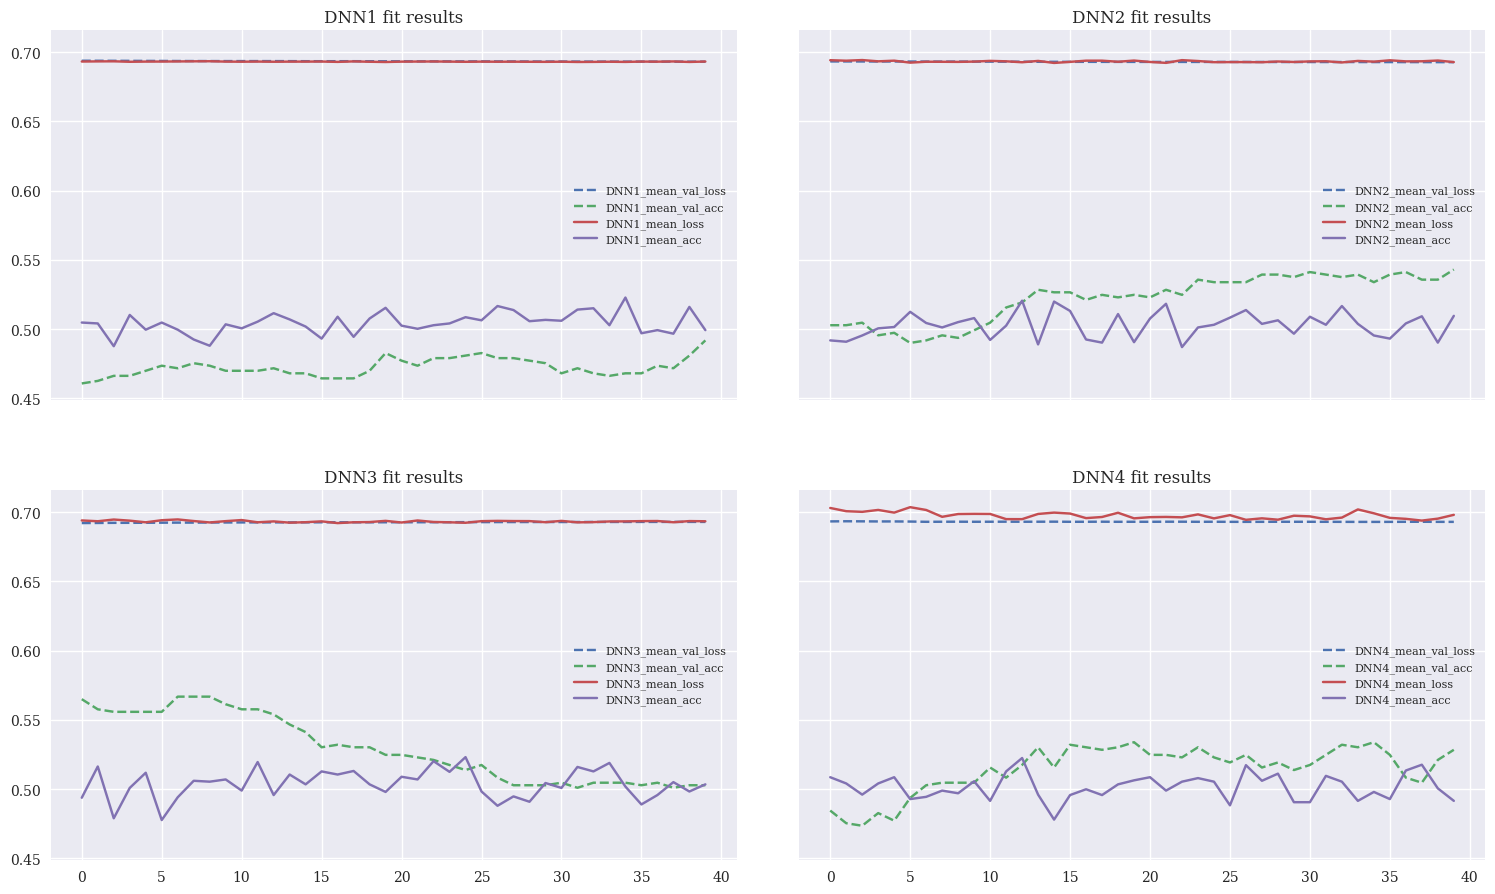

In [99]:
import warnings; warnings.simplefilter('ignore')

# Plot the DNN training results -plot funtion from formula_collection script
plot_results(DNN_models, DNN_results)

In [100]:
# DNN1, DNN2, DNN3, DNN4 are your neural network models 

threshold = 0.5

models = {'DNN1': DNN1, 'DNN2': DNN2, 'DNN3': DNN3, 'DNN4': DNN4}

# dataframes 
result_dfs = {}

for model_name, model in models.items():
    predictions = pd.DataFrame(np.where(model.predict(test[cols]) > threshold, 1, -1),
                               columns=[f"{model_name}_prediction_test"])
    result_dfs[model_name] = predictions

e = pd.DataFrame(np.where(test['d'] > threshold, 1, -1), columns=["direction"])

# Reset the index of the 'test' DataFrame
test.reset_index(inplace=True)

# Concatenate the DataFrames
result_dfs['direction'] = e
df_DNN_results = pd.concat([result_dfs[model_name] for model_name in models.keys()] +
                           [test[['c', 'return']], result_dfs['direction']], axis=1)

29/29 [==============================] - 0s 2ms/step


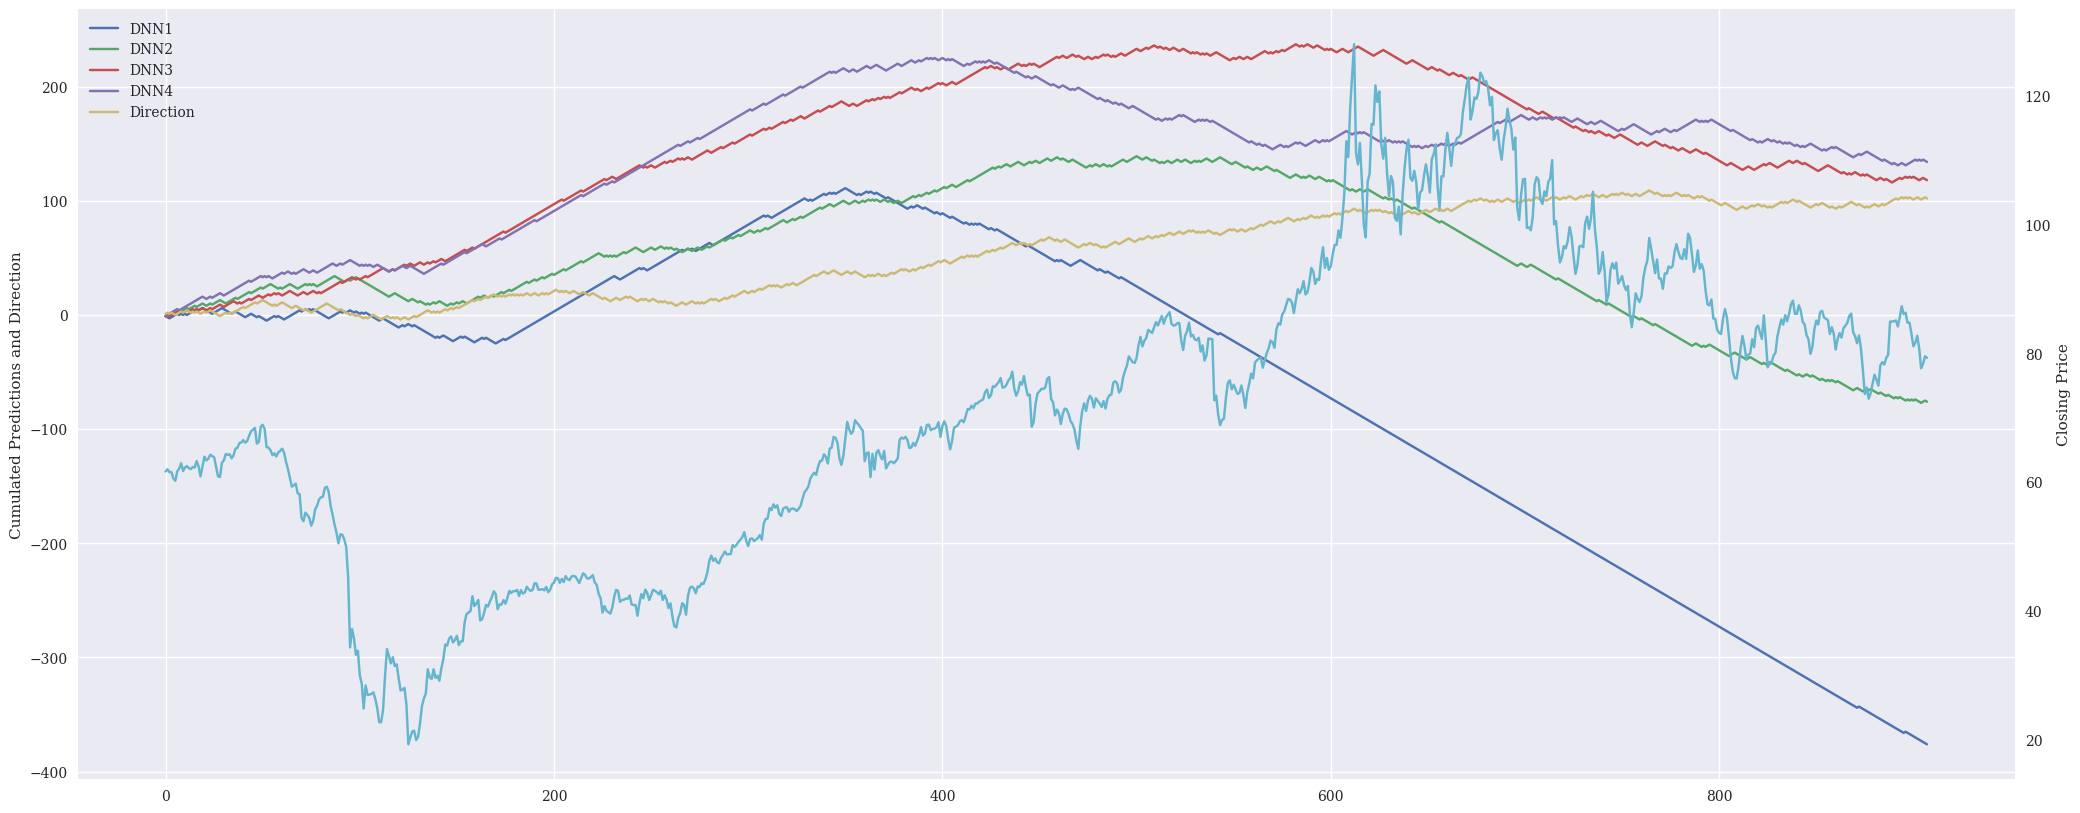

In [101]:
# df_DNN_results is your DataFrame containing the data for plotting

import matplotlib.pyplot as plt

# Plotting the cumulative predictions and cumulative direction on the primary y-axis
ax = df_DNN_results[[
    'DNN1_prediction_test',
    'DNN2_prediction_test',
    'DNN3_prediction_test',
    'DNN4_prediction_test',
    'direction'
]].cumsum().plot(figsize=(25, 10), grid=True)

# Plotting the closing price ('c') on the secondary y-axis
df_DNN_results['c'].plot(subplots=False, secondary_y=True, ax=ax)

# Adding labels to the y-axes
ax.set_ylabel('Cumulated Predictions and Direction')  # Left y-axis (cumulated predictions and direction)
ax.right_ax.set_ylabel('Closing Price')  # Right y-axis (closing price)

# Adding a legend
ax.legend(loc='upper left', labels=['DNN1', 'DNN2', 'DNN3', 'DNN4', 'Direction', 'c'])

# Display the plot
plt.show()


<Axes: title={'center': 'strategies on DNN 1-4 compared to Brent / chart 2'}>

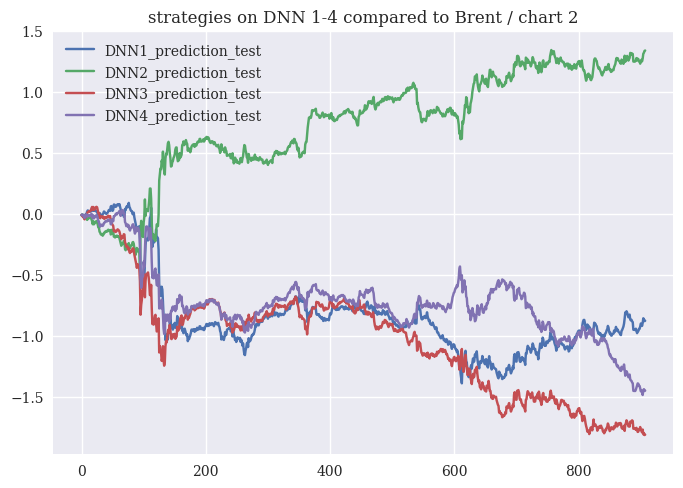

In [102]:
# plotting cumulated returns on the 4 DNN strategies 
df_strategies = df_DNN_results.filter(like='prediction')*df_DNN_results[['return']].values
df_strategies.cumsum().plot(title='strategies on DNN 1-4 compared to Brent / chart 2')

### Comment on the fitting results process of DNN1 to DNN4: 
- DNN4 achieves the higher final accuracy - performing signifcantly better than the other models [53%]
- DNN3 achieves the highest result during training [56%] - but has not been improved further
- DNN2 has a Max Accuracy: 0.5374771356582642 and a Final Accuracy: 0.5228519439697266, it is compared to the other DNN models not ranked first, but predicts in the important movement the correct market move [1;-1] to gain important returns


### Comment on chart1 and chart2 - prediction and strategies on test data :
- Relevant is the magnitude of the predicted move. It doesnt help if the model is right in more than 58% of the cases. The important element is that the model is right when returns are strongly moving in total $ terms.
- The DNN prediction (chart 1) shows for DNN2 (red) movements which are similar to the direction (blue) between index 200 to 400 and as well for roughly index 700 until 900 (bearish direction)
- The major difference on the 4 strategies is on the begining of the test data between index 0 and 150 (chart 2), where DNN1, DNN3 and DNN4 are running in the wrong direction and losing much of the value which can not be offset by the later gains from index 200 to 900. Only DNN2 is showing good results from index 100 onwards. 



### Conculsion and next steps 

We have been trying several types of model approaches from very basic (RSI, bolliger Band) to more advanced (Knn, logistic, RNN and DNN) ones with different types of code structures from very generic (simple line codes with formula collection) to more advanced (pipeline structure, object oriented) set ups. 

- Applying simplistic algo models based on Bolliger Band and RSI tend not to be applicable in market circumstances, there are indeed moments where such approaches help to generate positive return in your book. Trending markets are probably helping in such a algo set up, but for example on the bolliger band the parameters need to be set dynamically that the market direction is catched correctly in the algo framework (min and max border limits changing). 

- Looking at the Sklearn libary with the models of logistic regression compared to KNN Classifer, shows pretty interesting results for the KNN classifer which is definitely outperforming compared to Logistics model. On the Test data Knn classifer is catching the trends of Brent pretty accurately, whereas Logistic classifier has issues to create cumulated positive returns in the period of 2017/2023. 

- The DNN algo combined with different input parameters improves for sure the output, but there is still room for improvement in terms of results. Overall on the DNN side, it is interesting how the performance results are different while chosing changing neurons and hidden layers for the test data. Currently the Model 2 DNN2 shows best performance on the Test data. 

- Obvsiouly, further development on such a AI model makes sense and as well further digging into CNN and RNN and even combining theses approaches. So far, I do have not much experience in that field but definitely one way to go. 

- On the coding structure, it might make sense to compbine the pipeline structure with the DNN objective oriented coding structure in order to run the code on less lines and faster. But here is a little bit the question if a Keras libary can be easily combined with Sklearn (compability)... 

